In [ ]:
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Create a dictionary to store datasets for each digit
datasets = {}

# Loop through digits 0-9 and create a dataset for each
for digit in range(10):
    # Select the samples corresponding to the current digit
    digit_data = x_train[y_train == digit]
    digit_labels = y_train[y_train == digit]

    # You can store them as datasets or directly in the dictionary
    datasets[f"dataset{digit}"] = (digit_data, digit_labels)

# Example: Access dataset for digit 3
dataset3_data, dataset3_labels = datasets["dataset3"]
print(f"Dataset for digit 3: {dataset3_data.shape}, {dataset3_labels.shape}")

# Optionally, repeat this process for the test set if needed


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset for digit 3: (6131, 28, 28), (6131,)


In [ ]:
import tensorflow as tf
import numpy as np

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Create a dictionary to store datasets for each digit
datasets = {}

# Loop through digits 0-9 and create a dataset for each
for digit in range(10):
    # Select the samples corresponding to the current digit
    digit_data = x_train[y_train == digit]
    digit_labels = y_train[y_train == digit]

    # Store them in the dictionary
    datasets[f"dataset{digit}"] = (digit_data, digit_labels)

# Now print the dataset shapes for each digit (0-9)
for digit in range(10):
    digit_data, digit_labels = datasets[f"dataset{digit}"]
    print(f"Dataset for digit {digit}: {digit_data.shape}, {digit_labels.shape}")


Dataset for digit 0: (5923, 28, 28), (5923,)
Dataset for digit 1: (6742, 28, 28), (6742,)
Dataset for digit 2: (5958, 28, 28), (5958,)
Dataset for digit 3: (6131, 28, 28), (6131,)
Dataset for digit 4: (5842, 28, 28), (5842,)
Dataset for digit 5: (5421, 28, 28), (5421,)
Dataset for digit 6: (5918, 28, 28), (5918,)
Dataset for digit 7: (6265, 28, 28), (6265,)
Dataset for digit 8: (5851, 28, 28), (5851,)
Dataset for digit 9: (5949, 28, 28), (5949,)


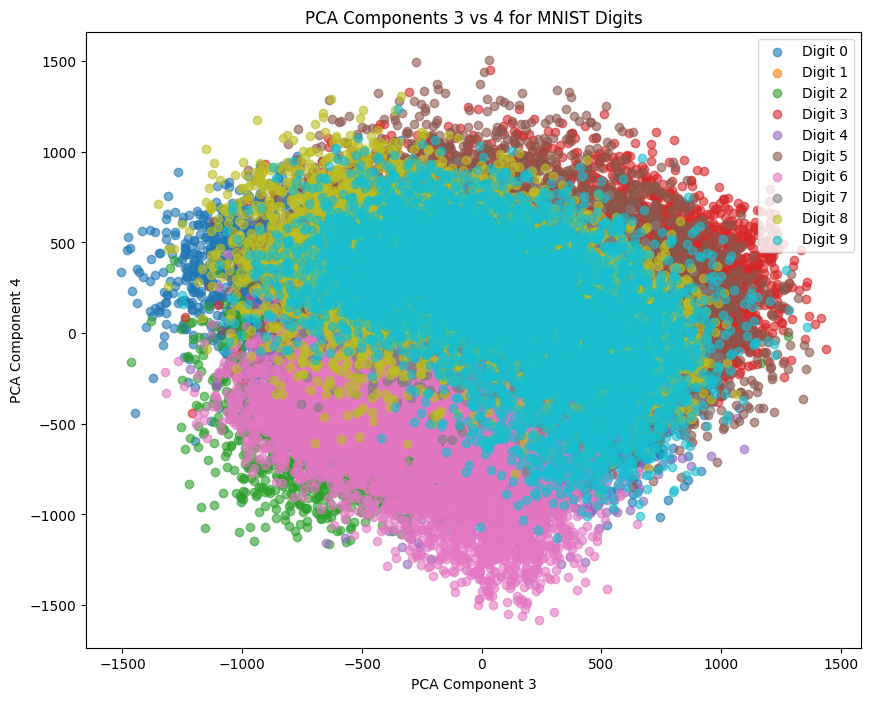

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the images from 28x28 to 784 features (1D array)
x_train_flattened = x_train.reshape(-1, 28*28)

# Apply PCA to reduce to 4 components
pca = PCA(n_components=4)
x_train_pca = pca.fit_transform(x_train_flattened)

# Create a scatter plot for PCA components 3 and 4 (indices 2 and 3)
plt.figure(figsize=(10, 8))

# Loop through digits 0-9 to create a scatter plot for each digit
for digit in range(10):
    # Select data for the current digit
    digit_data = x_train_pca[y_train == digit]

    # Plot the 3rd and 4th PCA components (index 2 and 3)
    plt.scatter(digit_data[:, 2], digit_data[:, 3], label=f'Digit {digit}', alpha=0.6)

# Add labels and title
plt.xlabel('PCA Component 3')
plt.ylabel('PCA Component 4')
plt.title('PCA Components 3 vs 4 for MNIST Digits')
plt.legend(loc='upper right')

# Show the plot
plt.show()


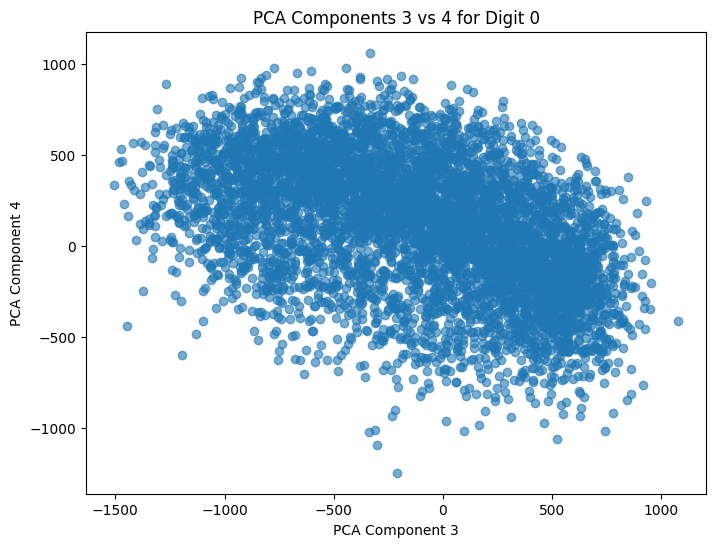

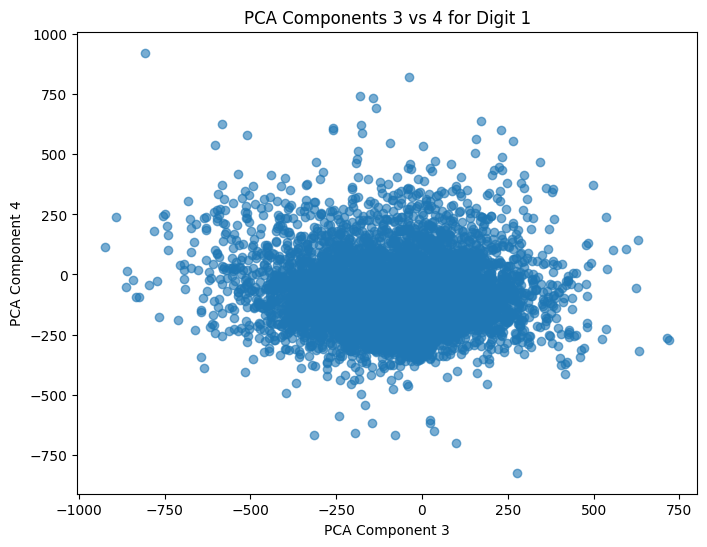

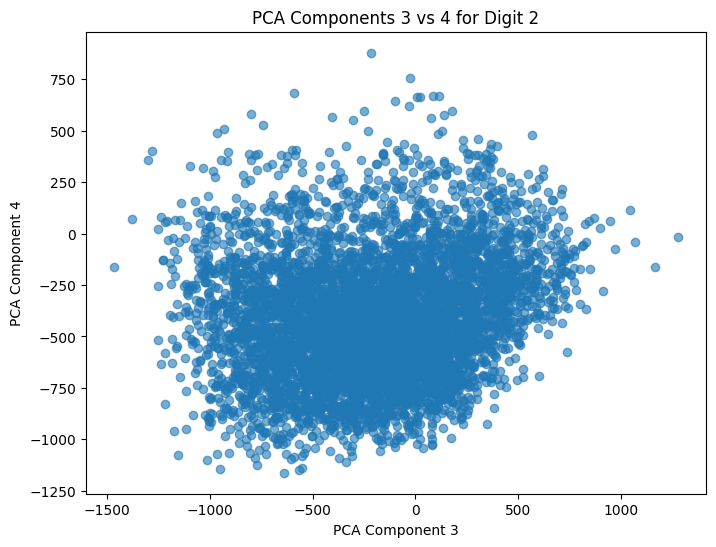

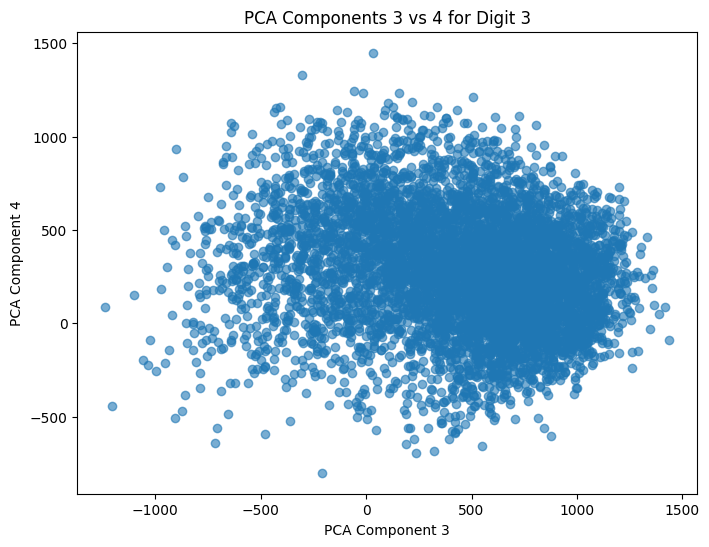

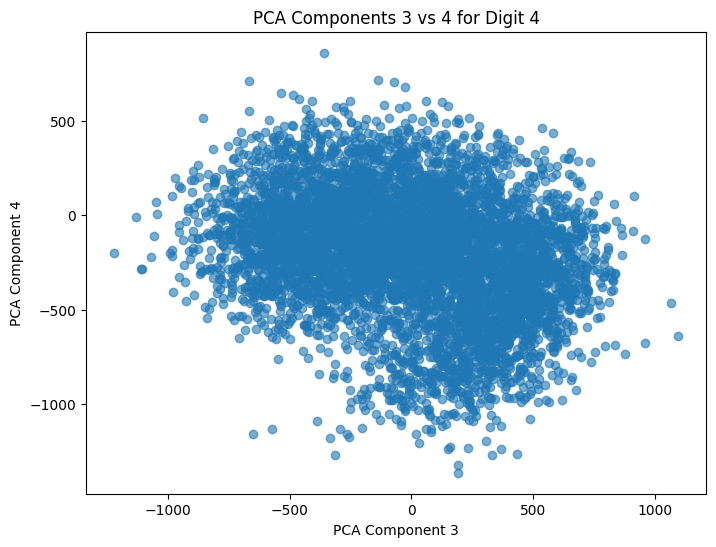

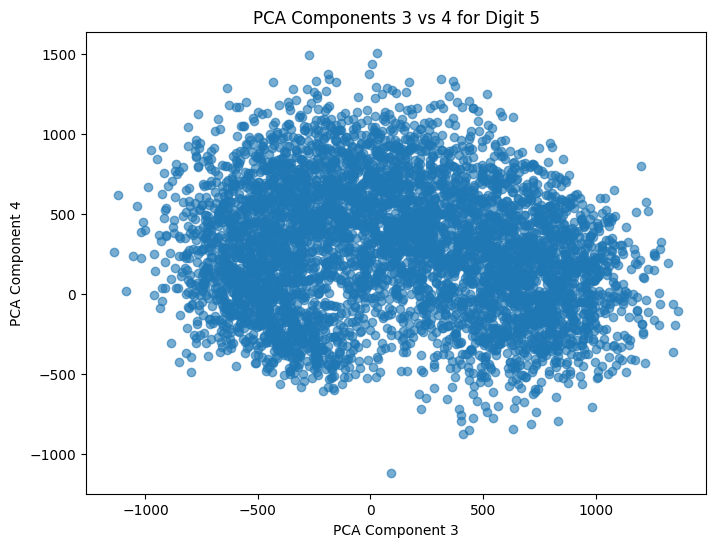

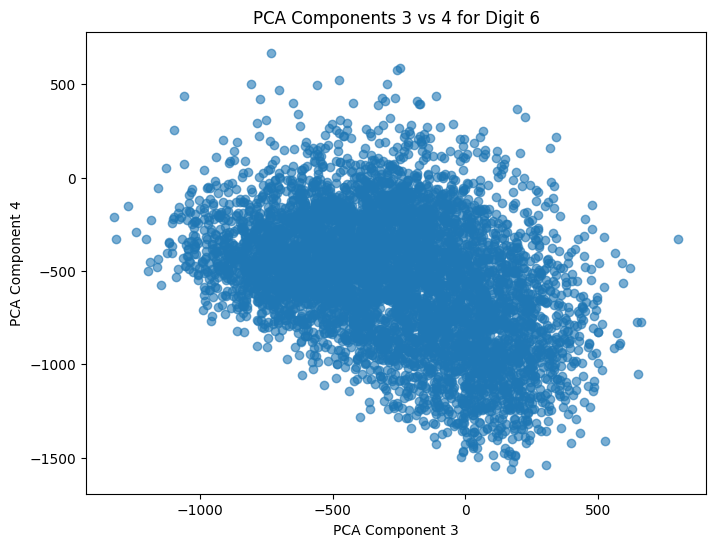

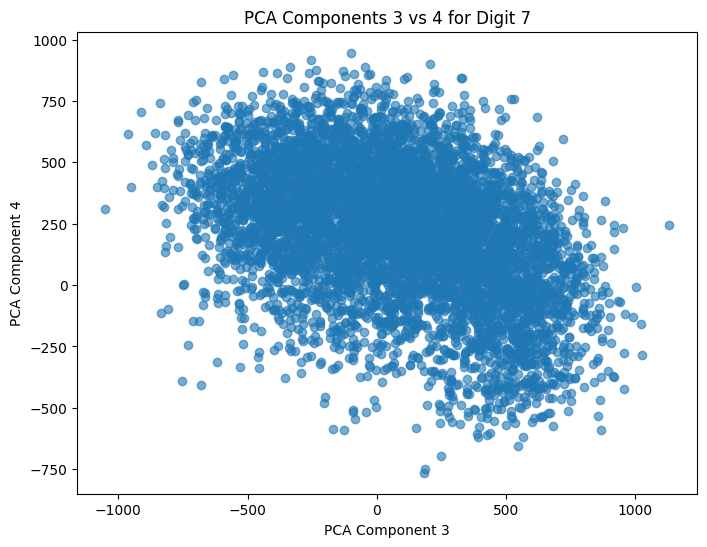

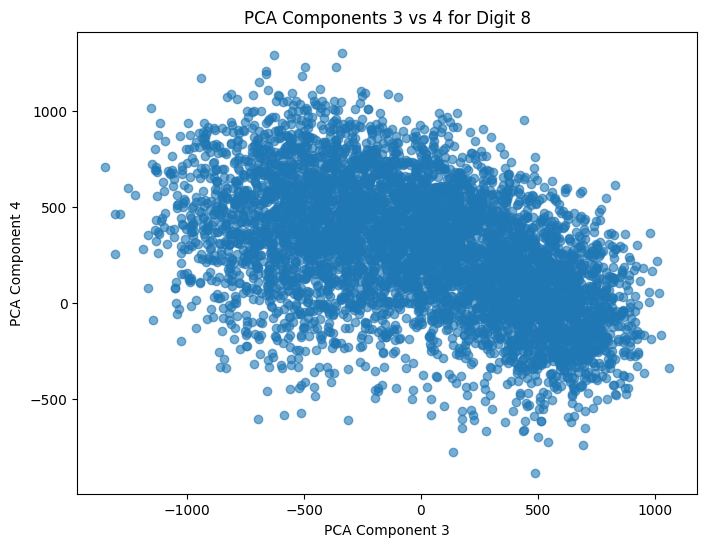

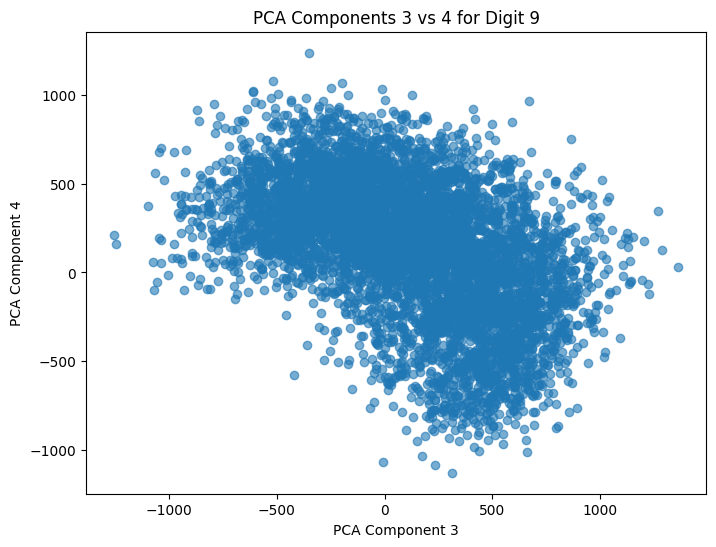

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the images from 28x28 to 784 features (1D array)
x_train_flattened = x_train.reshape(-1, 28*28)

# Apply PCA to reduce to 4 components
pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train_flattened)

# Loop through digits 0-9 and plot the PCA components 3 and 4 for each digit
for digit in range(10):
    # Select data for the current digit
    digit_data = x_train_pca[y_train == digit]

    # Plot the 3rd and 4th PCA components (index 2 and 3)
    plt.figure(figsize=(8, 6))
    plt.scatter(digit_data[:, 2], digit_data[:, 3], alpha=0.6)

    # Add labels and title
    plt.xlabel('PCA Component 3')
    plt.ylabel('PCA Component 4')
    plt.title(f'PCA Components 3 vs 4 for Digit {digit}')

    # Show the plot
    plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Function to compute eigenvalues and eigenvectors
def compute_eigenvalues_and_eigenvectors(data):
    # Flatten the images from 28x28 to 784 features
    flattened_data = data.reshape(-1, 28*28)

    # Compute the covariance matrix
    covariance_matrix = np.cov(flattened_data, rowvar=False)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    return eigenvalues, eigenvectors

# Create a dictionary to store datasets for each digit
datasets = {}

# Loop through digits 0-9 and create a dataset for each
for digit in range(10):
    # Select the samples corresponding to the current digit
    digit_data = x_train[y_train == digit]

    # Store them in the dictionary
    datasets[f"dataset{digit}"] = digit_data

# Compute eigenvalues and eigenvectors for each digit dataset
eigen_results = {}

for digit in range(10):
    digit_data = datasets[f"dataset{digit}"]
    eigenvalues, eigenvectors = compute_eigenvalues_and_eigenvectors(digit_data)

    # Store the eigenvalues and eigenvectors for the current digit
    eigen_results[f"digit_{digit}"] = {
        'eigenvalues': eigenvalues,
        'eigenvectors': eigenvectors
    }

# Example: print eigenvalues and eigenvectors for digit 0
digit_0_eigenvalues = eigen_results["digit_0"]['eigenvalues']
digit_0_eigenvectors = eigen_results["digit_0"]['eigenvectors']

print(f"Eigenvalues for digit 0: {digit_0_eigenvalues[:5]}")  # First 5 eigenvalues
print(f"Eigenvectors for digit 0 (first eigenvector): {digit_0_eigenvectors[:, 0]}")  # First eigenvector


Eigenvalues for digit 0: [-7.10683078e-11 -4.93119103e-11 -3.06901742e-11 -2.63328947e-11
 -2.16934673e-11]
Eigenvectors for digit 0 (first eigenvector): [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.10585179e-01  7.18112035e-02  3.98505848e-01 -7.48401671e-01
  1.76442773e-01  2.03467217e-01  2.65052477e-01 -3.11003776e-02
  3.50982382e-02  8.55278822e-02  5.22571990e-02  9.09203722e-02
 

Digit 0:
  Total variance explained by all components: 1.0000
  Cumulative variance explained by first 10 components: -0.0000
  Cumulative variance explained by first 50 components: -0.0000
  Cumulative variance explained by first 100 components: -0.0000
  Cumulative variance explained by first 784 components: 1.0000

Digit 1:
  Total variance explained by all components: 1.0000
  Cumulative variance explained by first 10 components: -0.0000
  Cumulative variance explained by first 50 components: -0.0000
  Cumulative variance explained by first 100 components: -0.0000
  Cumulative variance explained by first 784 components: 1.0000

Digit 2:
  Total variance explained by all components: 1.0000
  Cumulative variance explained by first 10 components: -0.0000
  Cumulative variance explained by first 50 components: -0.0000
  Cumulative variance explained by first 100 components: -0.0000
  Cumulative variance explained by first 784 components: 1.0000

Digit 3:
  Total variance explained by a

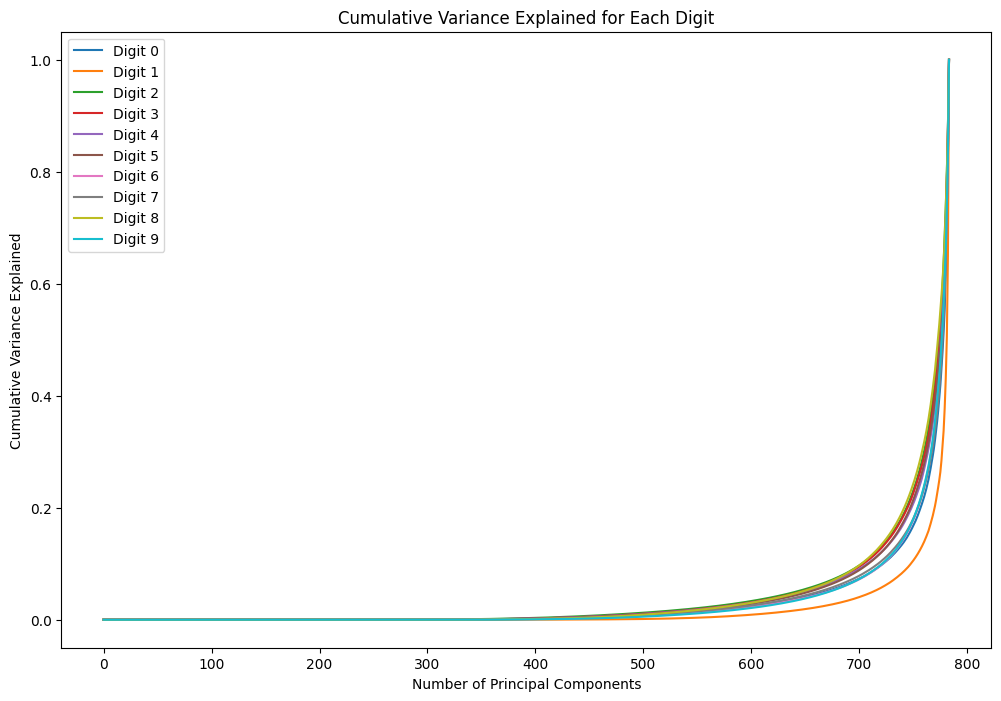

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Function to compute eigenvalues and eigenvectors
def compute_eigenvalues_and_eigenvectors(data):
    # Flatten the images from 28x28 to 784 features
    flattened_data = data.reshape(-1, 28*28)

    # Compute the covariance matrix
    covariance_matrix = np.cov(flattened_data, rowvar=False)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    return eigenvalues, eigenvectors

# Create a dictionary to store datasets for each digit
datasets = {}

# Loop through digits 0-9 and create a dataset for each
for digit in range(10):
    # Select the samples corresponding to the current digit
    digit_data = x_train[y_train == digit]

    # Store them in the dictionary
    datasets[f"dataset{digit}"] = digit_data

# Compute eigenvalues and eigenvectors for each digit dataset
eigen_results = {}
variance_results = {}

for digit in range(10):
    digit_data = datasets[f"dataset{digit}"]
    eigenvalues, eigenvectors = compute_eigenvalues_and_eigenvectors(digit_data)

    # Store the eigenvalues and eigenvectors for the current digit
    eigen_results[f"digit_{digit}"] = {
        'eigenvalues': eigenvalues,
        'eigenvectors': eigenvectors
    }

    # Compute proportion of variance explained by each eigenvector
    prop_var = eigenvalues / np.sum(eigenvalues)

    # Compute cumulative variance
    cum_var = np.cumsum(prop_var)

    # Store the results for variance and cumulative variance
    variance_results[f"digit_{digit}"] = {
        'proportion_variance': prop_var,
        'cumulative_variance': cum_var
    }

    # Print the results for this digit
    print(f"Digit {digit}:")
    print(f"  Total variance explained by all components: {np.sum(prop_var):.4f}")
    print(f"  Cumulative variance explained by first 10 components: {cum_var[9]:.4f}")
    print(f"  Cumulative variance explained by first 50 components: {cum_var[49]:.4f}")
    print(f"  Cumulative variance explained by first 100 components: {cum_var[99]:.4f}")

    # Handle the case where there are fewer than 1000 components
    if len(cum_var) > 999:
        print(f"  Cumulative variance explained by first 1000 components: {cum_var[999]:.4f}")
    else:
        print(f"  Cumulative variance explained by first {len(cum_var)} components: {cum_var[-1]:.4f}")
    print()

# Optionally, you can plot the cumulative variance for each digit to visualize it
plt.figure(figsize=(12, 8))
for digit in range(10):
    plt.plot(variance_results[f"digit_{digit}"]['cumulative_variance'], label=f"Digit {digit}")

plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Explained for Each Digit")
plt.legend()
plt.show()


Eigenvalues: [-4.66237761e-11 -1.86026653e-11 -1.61131751e-11 -1.60178489e-11
 -1.55870328e-11]
Proportion of variance explained by each principal component: [-3.18970843e-17 -1.27267852e-17 -1.10236311e-17 -1.09584148e-17
 -1.06636772e-17]
Cumulative variance explained: [-3.18970843e-17 -4.46238696e-17 -5.56475006e-17 -6.66059154e-17
 -7.72695927e-17]


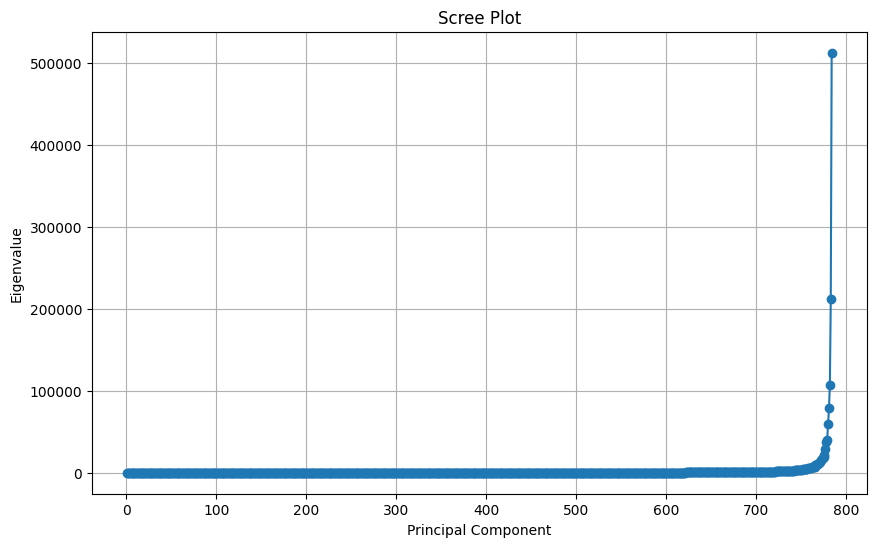

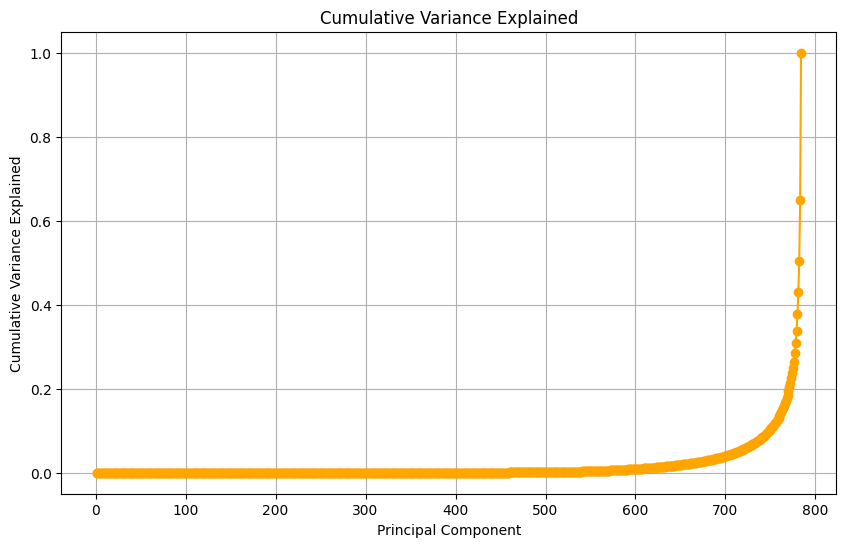

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Extract dataset1_data (data for digit 1)
dataset1_data = x_train[y_train == 1]

# Step 1: Flatten the images from 28x28 to 784 features
flattened_data = dataset1_data.reshape(-1, 28*28)

# Step 2: Compute the covariance matrix
covariance_matrix = np.cov(flattened_data, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Step 4: Calculate the proportion of variance explained by each eigenvalue
prop_var = eigenvalues / np.sum(eigenvalues)

# Step 5: Calculate the cumulative variance
cum_var = np.cumsum(prop_var)

# Print the results (first few eigenvalues, proportion of variance explained, etc.)
print(f"Eigenvalues: {eigenvalues[:5]}")  # First 5 eigenvalues
print(f"Proportion of variance explained by each principal component: {prop_var[:5]}")  # First 5 components
print(f"Cumulative variance explained: {cum_var[:5]}")  # First 5 cumulative variances

# Step 6: Plot the Scree plot (Eigenvalue vs Principal Components)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Step 7: Plot the Cumulative Variance Explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', color='orange')
plt.title('Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()


Number of components required to explain 90% of the variance: 36


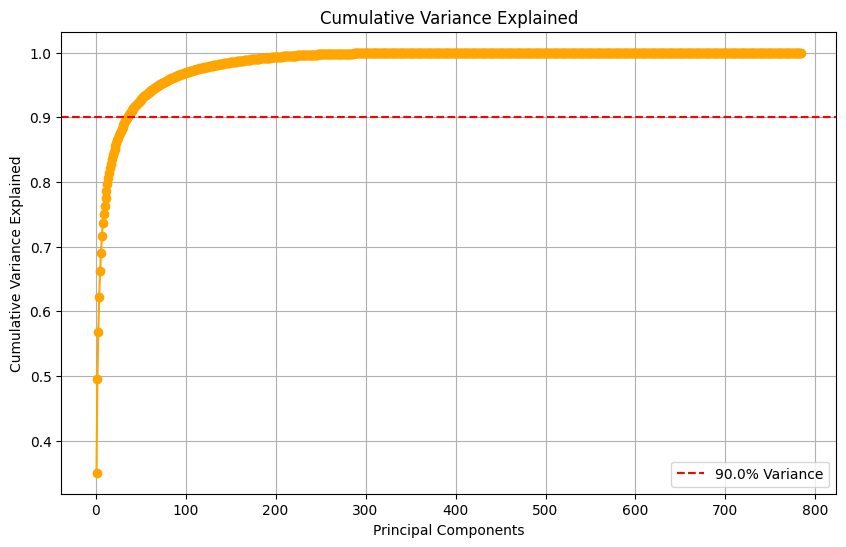

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Extract dataset1_data (data for digit 1)
dataset1_data = x_train[y_train == 1]

# Step 1: Flatten the images from 28x28 to 784 features
flattened_data = dataset1_data.reshape(-1, 28*28)

# Step 2: Perform PCA
pca = PCA()
pca.fit(flattened_data)

# Step 3: Calculate the cumulative variance explained by each principal component
cum_var = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Set the threshold (90% variance)
threshold = 0.90

# Step 5: Find the number of components required to explain at least 90% of the variance
num_components_90 = np.argmax(cum_var >= threshold) + 1  # +1 because index starts at 0

# Print the number of components needed for 90% variance
print(f"Number of components required to explain 90% of the variance: {num_components_90}")

# Optional: Visualize the cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', color='orange')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold * 100}% Variance')
plt.title('Cumulative Variance Explained')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()


Number of components required to explain 90% of the variance: 36


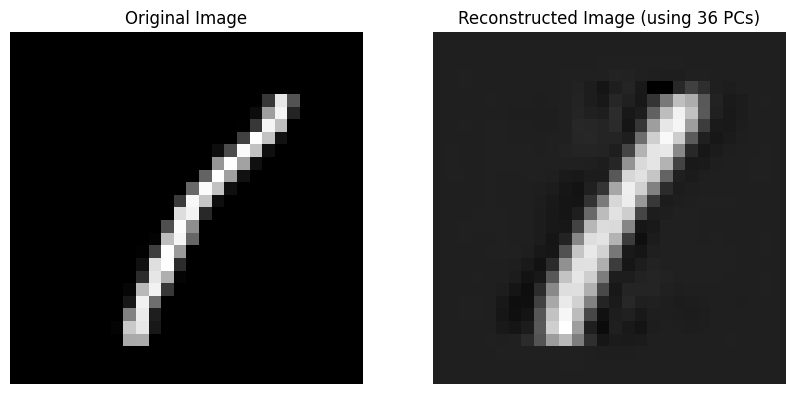

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Extract dataset1_data (data for digit 1)
dataset1_data = x_train[y_train == 1]

# Step 1: Flatten the images from 28x28 to 784 features
flattened_data = dataset1_data.reshape(-1, 28*28)

# Step 2: Perform PCA
pca = PCA()
pca.fit(flattened_data)

# Step 3: Calculate the cumulative variance explained by each principal component
cum_var = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Set the threshold (90% variance) and get the number of components needed
threshold = 0.90
num_components_90 = np.argmax(cum_var >= threshold) + 1  # +1 because index starts at 0
print(f"Number of components required to explain 90% of the variance: {num_components_90}")

# Step 5: Use only the selected number of components for dimensionality reduction
pca_reduced = PCA(n_components=num_components_90)
pca_reduced.fit(flattened_data)

# Step 6: Transform the data into the reduced principal components space
reduced_data = pca_reduced.transform(flattened_data)

# Step 7: Reconstruct the images from the reduced components
reconstructed_data = pca_reduced.inverse_transform(reduced_data)

# Step 8: Reshape the reconstructed data back to the original image shape (28x28)
reconstructed_images = reconstructed_data.reshape(-1, 28, 28)

# Step 9: Visualize the original and reconstructed images for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image (first image from the dataset)
axes[0].imshow(dataset1_data[6741], cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the reconstructed image
axes[1].imshow(reconstructed_images[0], cmap='gray')
axes[1].set_title(f'Reconstructed Image (using {num_components_90} PCs)')
axes[1].axis('off')

plt.show()


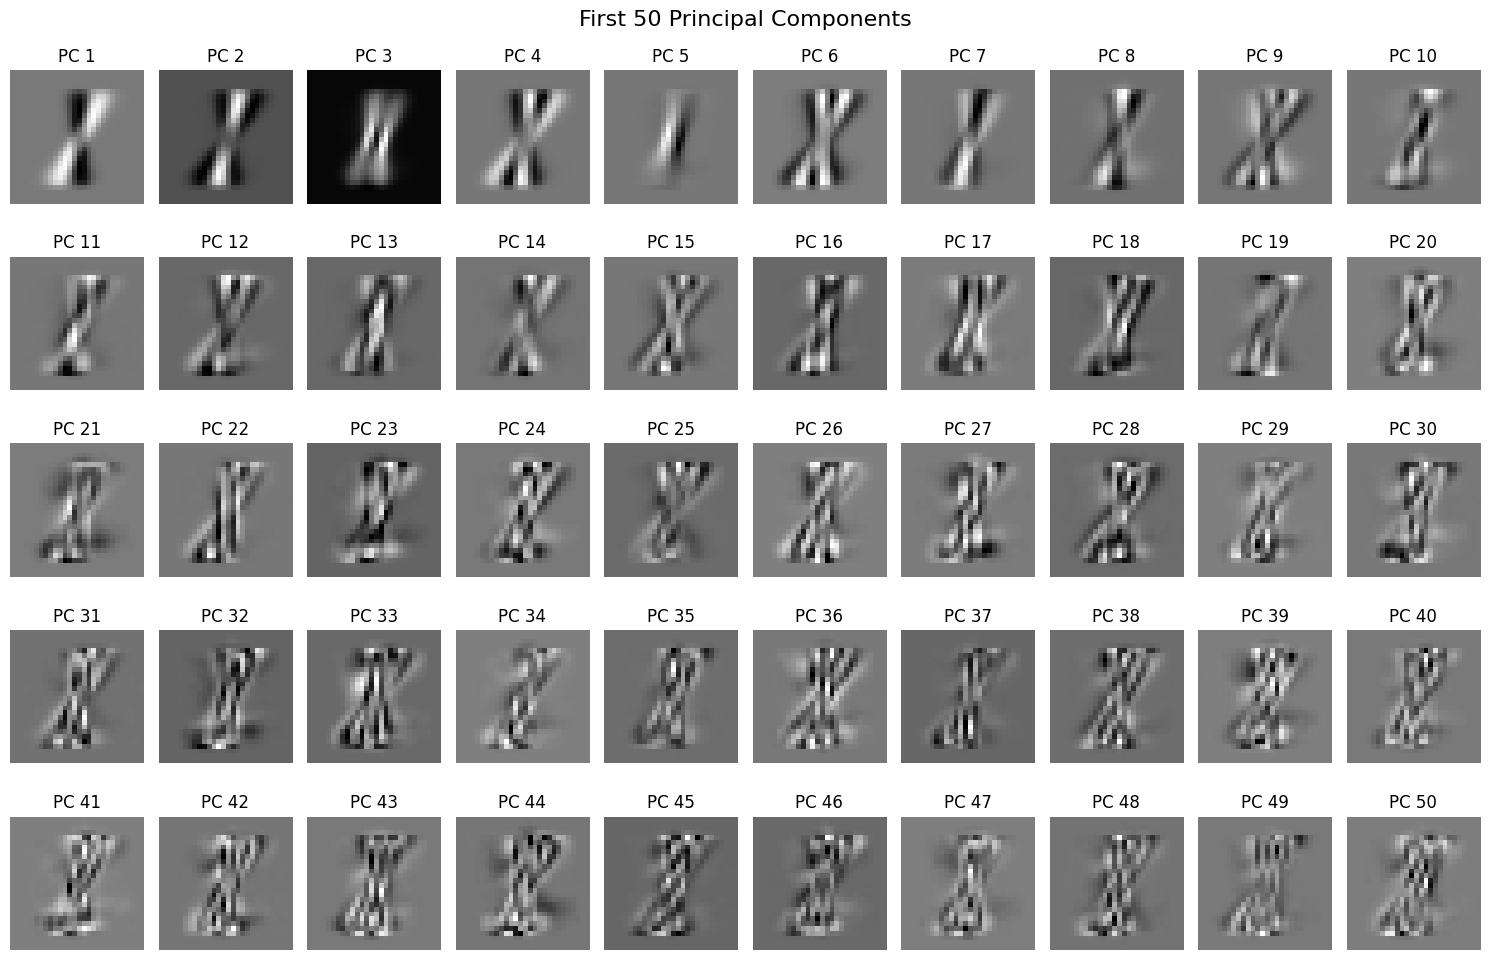

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 50 is different from 10)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Extract dataset1_data (data for digit 1)
dataset1_data = x_train[y_train == 1]

# Step 1: Flatten the images from 28x28 to 784 features
flattened_data = dataset1_data.reshape(-1, 28*28)

# Step 2: Perform PCA on the flattened data
pca = PCA(n_components=50)  # Let's start with 50 components to capture more variation
pca.fit(flattened_data)

# Step 3: Plot the first few principal components (Eigenvectors)
fig, axes = plt.subplots(5, 10, figsize=(15, 10))
for i in range(50):
    ax = axes[i // 10, i % 10]
    ax.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'PC {i+1}')
plt.suptitle("First 50 Principal Components", fontsize=16)
plt.tight_layout()
plt.show()

# Step 4: Reconstruct the digit "1" using different numbers of principal components
# Using the first 10 components for example
reduced_data = pca.transform(flattened_data)  # Project original data to reduced space

# Reconstruct using first 10 components
reconstructed_data_10 = pca.inverse_transform(reduced_data[:, :10])

# Reconstruct using first 30 components
reconstructed_data_30 = pca.inverse_transform(reduced_data[:, :30])

# Reshape the reconstructed data back to image form (28x28)
reconstructed_images_10 = reconstructed_data_10.reshape(-1, 28, 28)
reconstructed_images_30 = reconstructed_data_30.reshape(-1, 28, 28)

# Step 5: Visualize the original and reconstructed images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image (first image from the dataset)
axes[0].imshow(dataset1_data[0], cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Reconstructed image using first 10 components
axes[1].imshow(reconstructed_images_10[0], cmap='gray')
axes[1].set_title('Reconstructed with 10 PCs')
axes[1].axis('off')

# Reconstructed image using first 30 components
axes[2].imshow(reconstructed_images_30[0], cmap='gray')
axes[2].set_title('Reconstructed with 30 PCs')
axes[2].axis('off')

plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


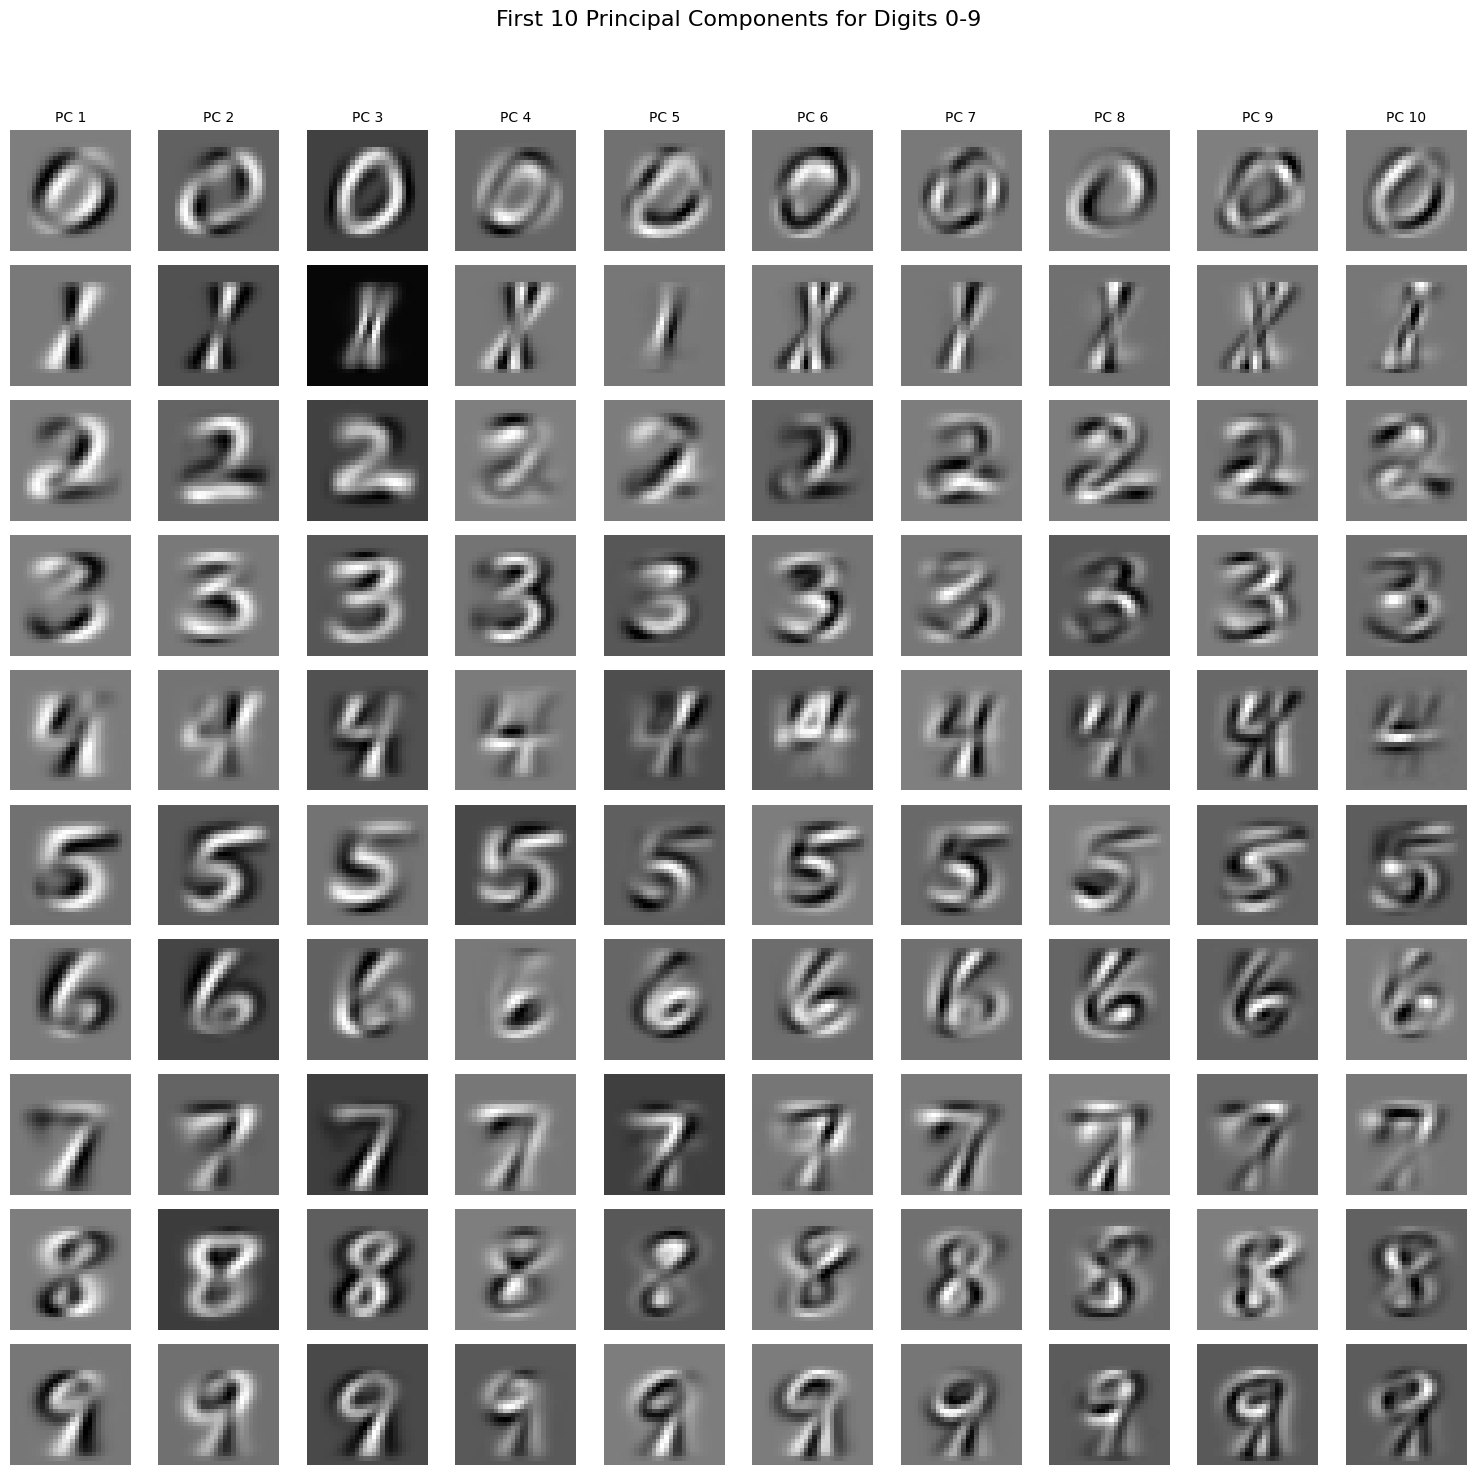

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Step 1: Loop through all digits (0-9)
fig, axes = plt.subplots(10, 10, figsize=(15, 15))  # 10 rows for digits, 10 columns for PCs

for digit in range(10):
    # Extract data for the current digit
    digit_data = x_train[y_train == digit]

    # Flatten the images from 28x28 to 784 features
    flattened_data = digit_data.reshape(-1, 28 * 28)

    # Perform PCA on the flattened data
    pca = PCA(n_components=10)  # First 10 components
    pca.fit(flattened_data)

    # Plot the first 10 principal components (Eigenvectors)
    for pc in range(10):
        ax = axes[digit, pc]
        ax.imshow(pca.components_[pc].reshape(28, 28), cmap='gray')
        ax.axis('off')
        if digit == 0:
            ax.set_title(f'PC {pc+1}', fontsize=10)  # Title for the top row

plt.suptitle("First 10 Principal Components for Digits 0-9", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust space for the title
plt.show()


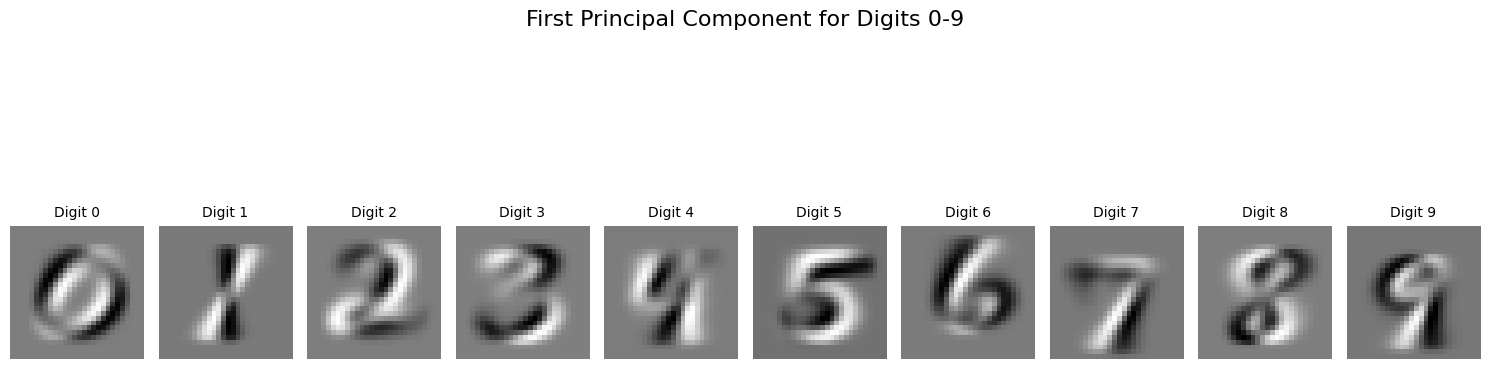

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Initialize a figure for the subplots
fig, axes = plt.subplots(1, 10, figsize=(15, 5))  # 1 row for digits, 10 columns for each digit

for digit in range(10):
    # Extract data for the current digit
    digit_data = x_train[y_train == digit]

    # Flatten the images from 28x28 to 784 features
    flattened_data = digit_data.reshape(-1, 28 * 28)

    # Perform PCA on the flattened data
    pca = PCA(n_components=1)  # Only the first component
    pca.fit(flattened_data)

    # Plot the first principal component
    ax = axes[digit]
    ax.imshow(pca.components_[0].reshape(28, 28), cmap='gray')
    ax.axis('off')  # Remove axis ticks
    ax.set_title(f'Digit {digit}', fontsize=10)  # Add digit label

# Add a global title
plt.suptitle("First Principal Component for Digits 0-9", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.8)  # Adjust space for the title
plt.show()


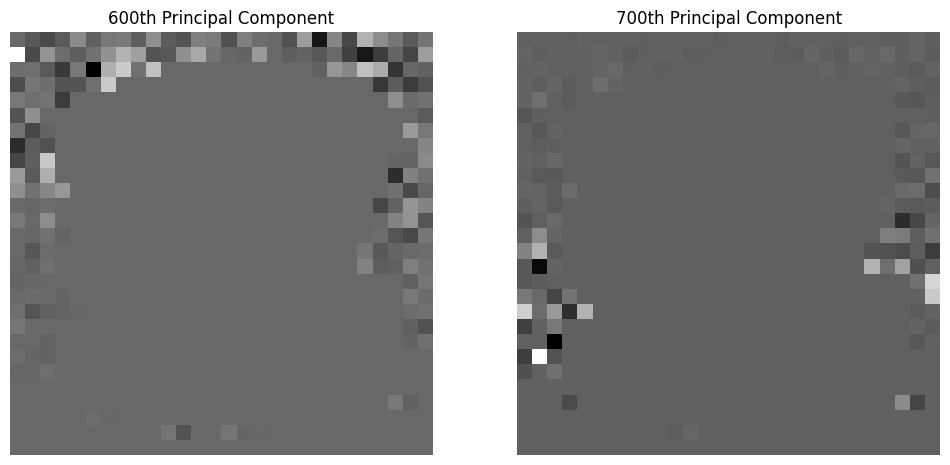

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Extract dataset1_data (data for digit 1)
dataset1_data = x_train[y_train == 1]

# Step 1: Flatten the images from 28x28 to 784 features
flattened_data = dataset1_data.reshape(-1, 28*28)

# Step 2: Perform PCA on the flattened data with a large number of components (e.g., 784 to capture all variance)
pca = PCA(n_components=784)  # Number of components set to 784 for full dimensionality
pca.fit(flattened_data)

# Step 3: Plot the 600th and 700th principal components
if len(pca.components_) > 700:  # Ensure there are at least 700 components
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the 600th component (component 599 in 0-indexed Python)
    axes[0].imshow(pca.components_[599].reshape(28, 28), cmap='gray')
    axes[0].set_title('600th Principal Component')
    axes[0].axis('off')

    # Plot the 700th component (component 699 in 0-indexed Python)
    axes[1].imshow(pca.components_[699].reshape(28, 28), cmap='gray')
    axes[1].set_title('700th Principal Component')
    axes[1].axis('off')

    plt.show()
else:
    print("Not enough components. Please ensure that n_components is greater than 700.")


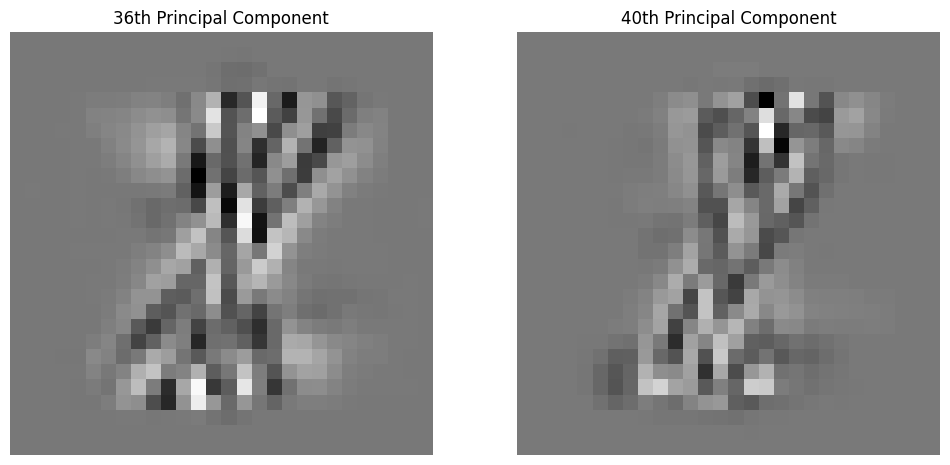

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Extract dataset1_data (data for digit 1)
dataset1_data = x_train[y_train == 1]

# Step 1: Flatten the images from 28x28 to 784 features
flattened_data = dataset1_data.reshape(-1, 28*28)

# Step 2: Perform PCA on the flattened data with a large number of components (e.g., 784 to capture all variance)
pca = PCA(n_components=784)  # Number of components set to 784 for full dimensionality
pca.fit(flattened_data)

# Step 3: Plot the 36th and 40th principal components
if len(pca.components_) >= 40:  # Ensure there are at least 40 components
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the 36th component (component 35 in 0-indexed Python)
    axes[0].imshow(pca.components_[35].reshape(28, 28), cmap='gray')
    axes[0].set_title('36th Principal Component')
    axes[0].axis('off')

    # Plot the 40th component (component 39 in 0-indexed Python)
    axes[1].imshow(pca.components_[39].reshape(28, 28), cmap='gray')
    axes[1].set_title('40th Principal Component')
    axes[1].axis('off')

    plt.show()
else:
    print("Not enough components. Please ensure that n_components is greater than 40.")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Clustering digit 0...
Clustering digit 1...
Clustering digit 2...
Clustering digit 3...
Clustering digit 4...
Clustering digit 5...
Clustering digit 6...
Clustering digit 7...
Clustering digit 8...
Clustering digit 9...


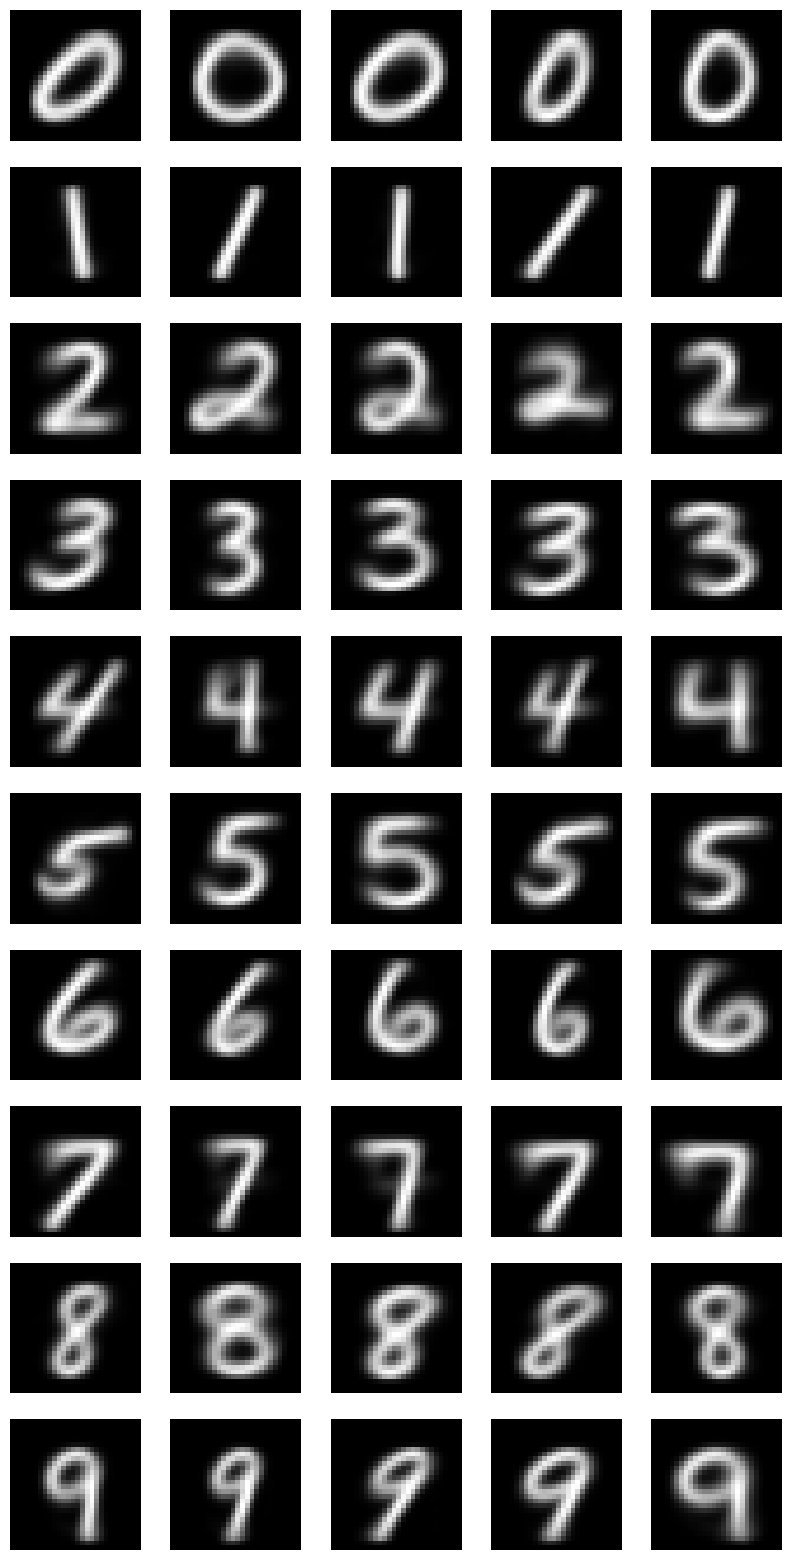

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the images and normalize pixel values
x_train_flattened = x_train.reshape(x_train.shape[0], -1)  # Flatten to 1D
x_train_normalized = x_train_flattened / 255.0  # Normalize to [0, 1]

# Step 2: Separate data by digit
digit_data = {digit: x_train_normalized[y_train == digit] for digit in range(10)}

# Step 3: Apply K-Means clustering for each digit
kmeans_results = {}
k = 5  # Number of clusters per digit

for digit, data in digit_data.items():
    print(f"Clustering digit {digit}...")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    kmeans_results[digit] = kmeans

# Step 4: Visualize cluster centers for each digit
fig, axes = plt.subplots(10, k, figsize=(k * 2, 20))
for digit, kmeans in kmeans_results.items():
    for cluster_idx in range(k):
        cluster_center = kmeans.cluster_centers_[cluster_idx]
        axes[digit, cluster_idx].imshow(cluster_center.reshape(28, 28), cmap='gray')
        axes[digit, cluster_idx].axis('off')


Training One-Class SVM for digit 0...
Training One-Class SVM for digit 1...
Training One-Class SVM for digit 2...
Training One-Class SVM for digit 3...
Training One-Class SVM for digit 4...
Training One-Class SVM for digit 5...
Training One-Class SVM for digit 6...
Training One-Class SVM for digit 7...
Training One-Class SVM for digit 8...
Training One-Class SVM for digit 9...
Number of inliers: 5329, Number of outliers: 594


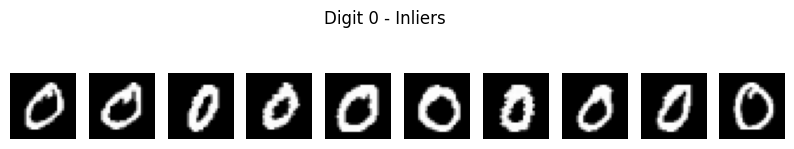

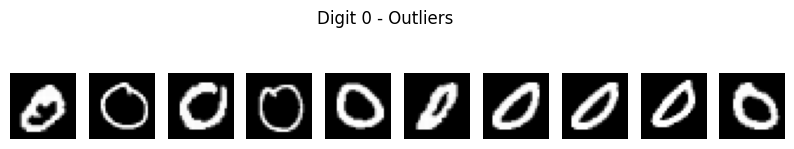

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the images and normalize pixel values
x_train_flattened = x_train.reshape(x_train.shape[0], -1)  # Flatten to 1D
x_train_normalized = x_train_flattened / 255.0  # Normalize to [0, 1]

# Separate data by digit
digit_data = {digit: x_train_normalized[y_train == digit] for digit in range(10)}

# One-Class SVM for each digit
ocsvm_results = {}
nu = 0.1  # Fraction of outliers
gamma = 0.001  # Kernel coefficient

for digit, data in digit_data.items():
    print(f"Training One-Class SVM for digit {digit}...")
    ocsvm = OneClassSVM(kernel='rbf', nu=nu, gamma=gamma)
    ocsvm.fit(data)  # Train on the digit's data
    ocsvm_results[digit] = ocsvm

# Visualize results for one digit (e.g., '0')
digit_to_visualize = 0
data = digit_data[digit_to_visualize]
ocsvm = ocsvm_results[digit_to_visualize]
predictions = ocsvm.predict(data)  # Predict inliers (+1) and outliers (-1)

# Separate inliers and outliers
inliers = data[predictions == 1]
outliers = data[predictions == -1]

# Plot inliers and outliers
def plot_samples(samples, title, n=10):
    plt.figure(figsize=(n, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(samples[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

print(f"Number of inliers: {len(inliers)}, Number of outliers: {len(outliers)}")
plot_samples(inliers[:10], title=f"Digit {digit_to_visualize} - Inliers")
plot_samples(outliers[:10], title=f"Digit {digit_to_visualize} - Outliers")


Training One-Class SVM for digit 0...
Training One-Class SVM for digit 1...
Training One-Class SVM for digit 2...
Training One-Class SVM for digit 3...
Training One-Class SVM for digit 4...
Training One-Class SVM for digit 5...
Training One-Class SVM for digit 6...
Training One-Class SVM for digit 7...
Training One-Class SVM for digit 8...
Training One-Class SVM for digit 9...
Digit 0: 5329 inliers, 594 outliers.


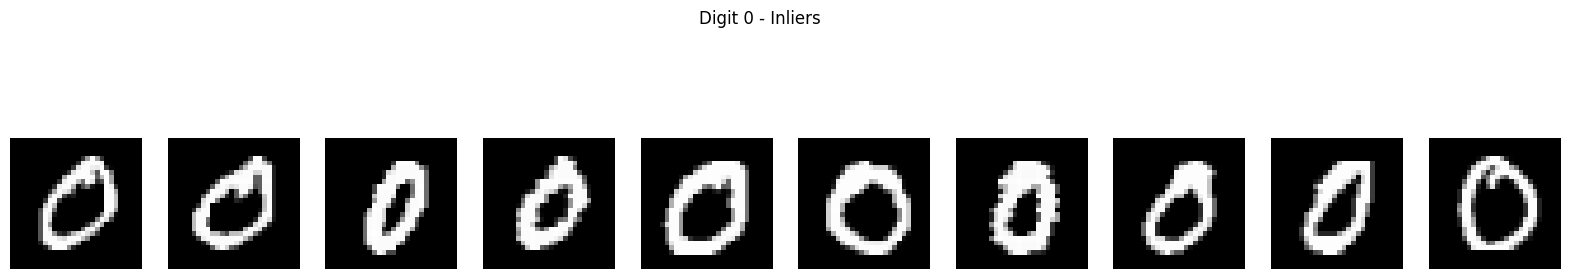

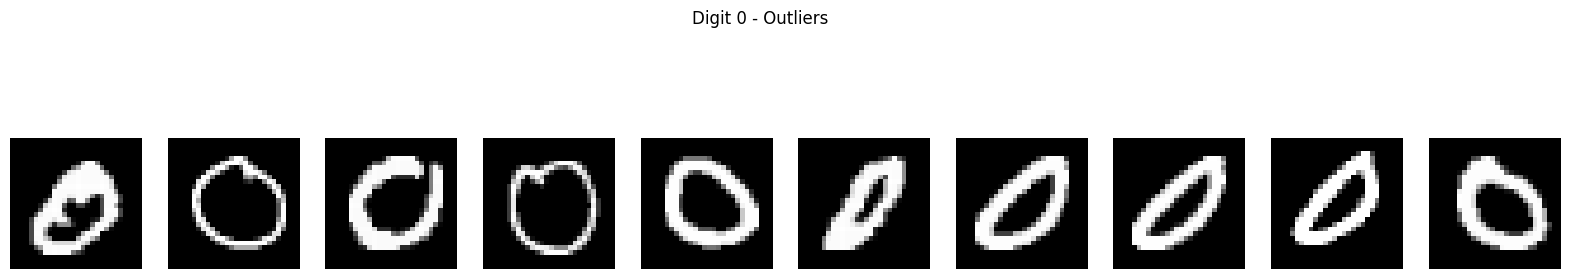

Digit 1: 6068 inliers, 674 outliers.


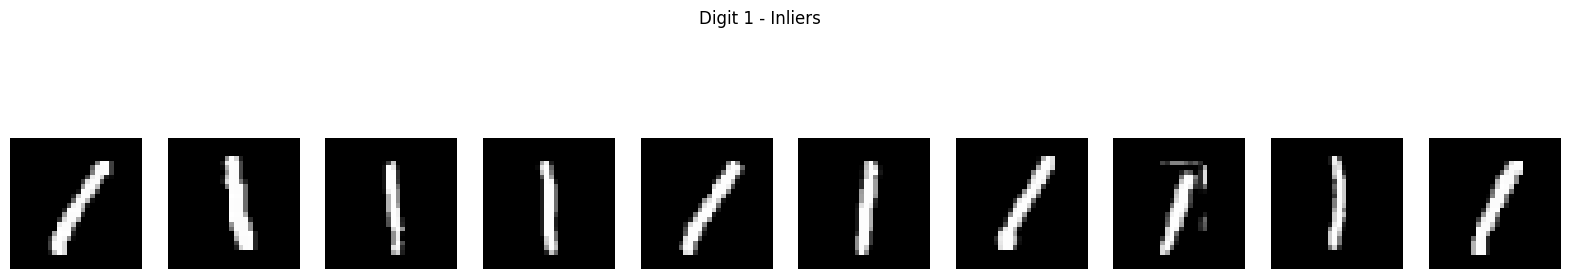

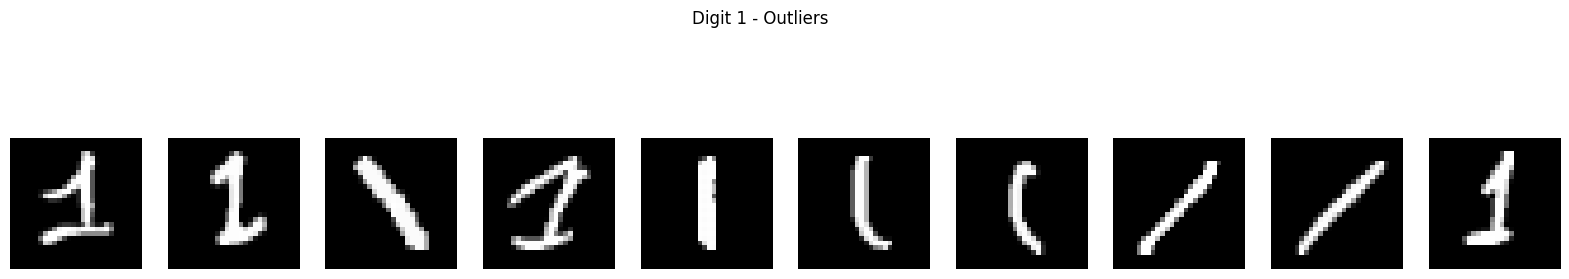

Digit 2: 5362 inliers, 596 outliers.


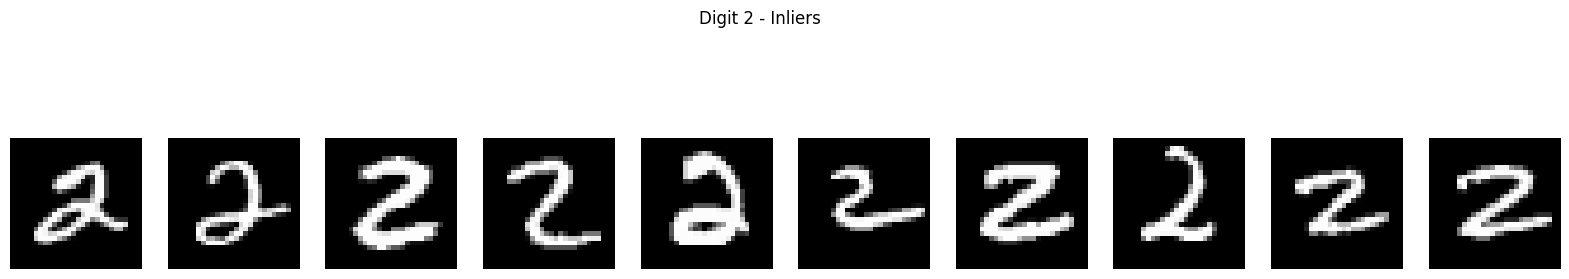

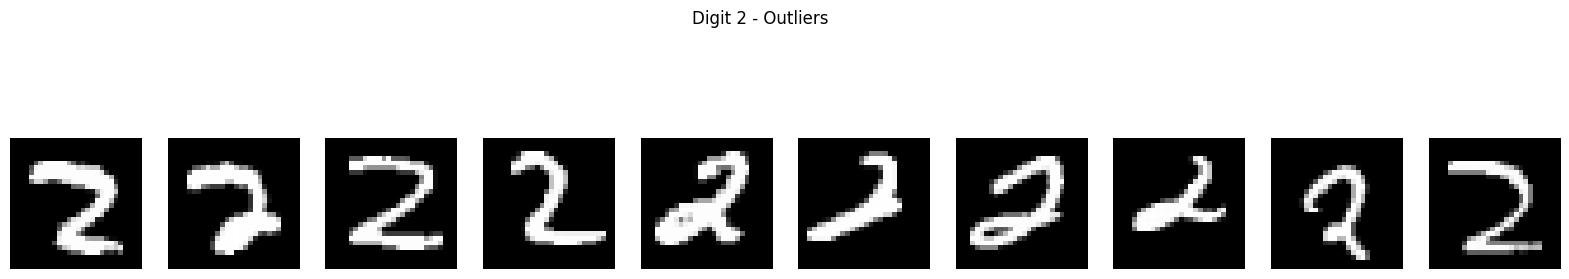

Digit 3: 5517 inliers, 614 outliers.


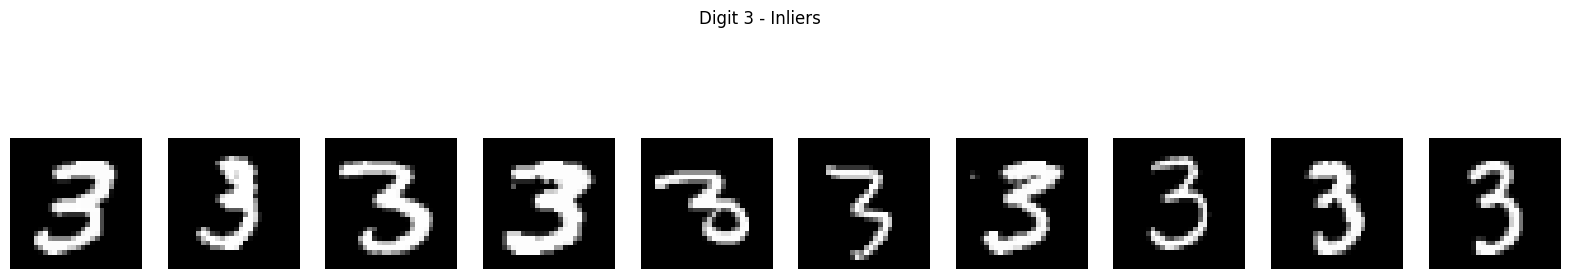

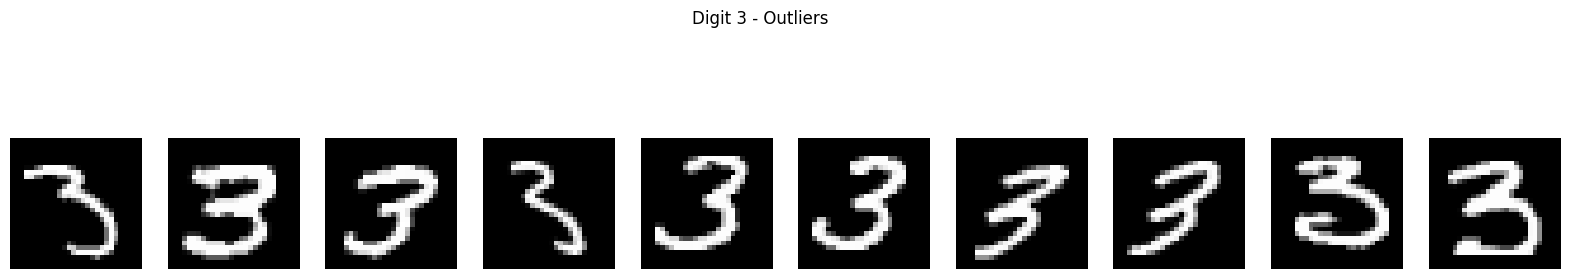

Digit 4: 5257 inliers, 585 outliers.


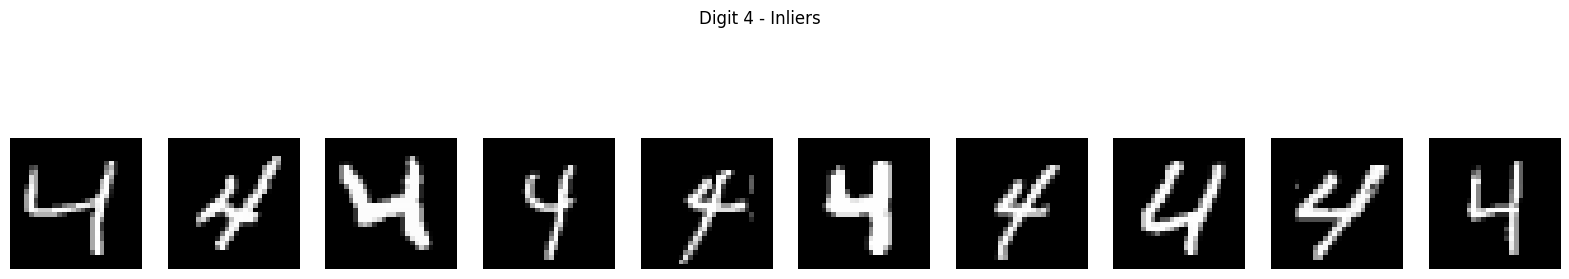

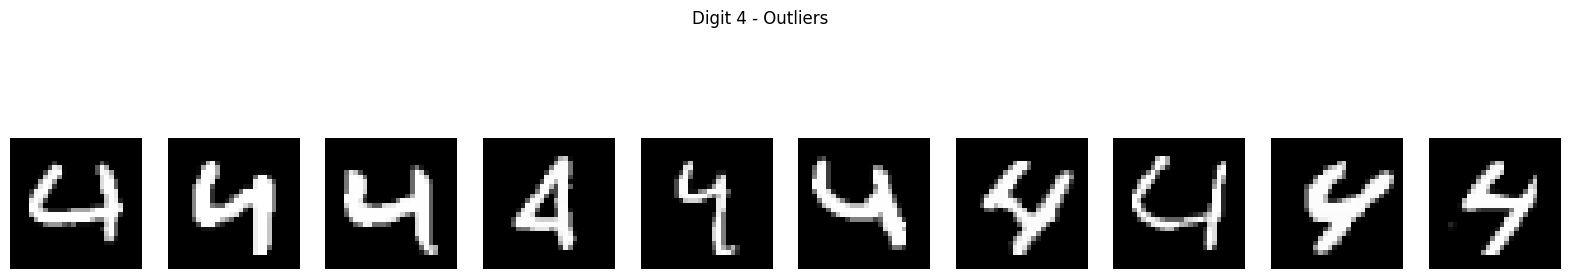

Digit 5: 4878 inliers, 543 outliers.


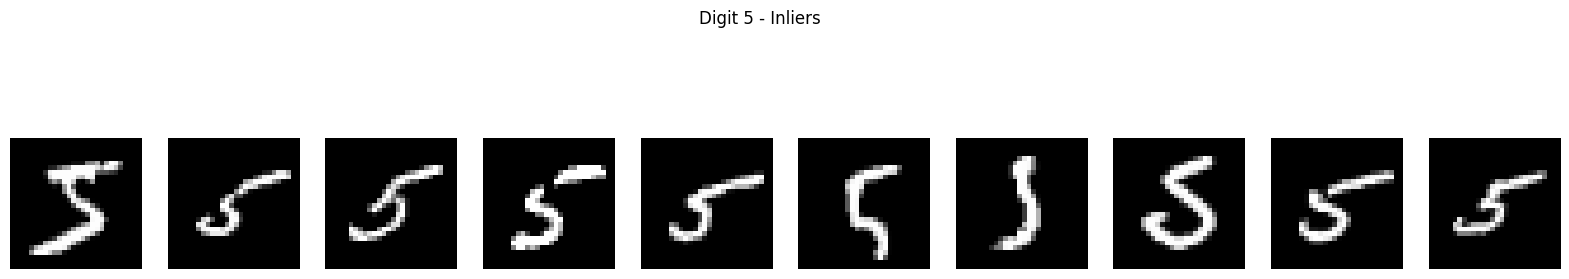

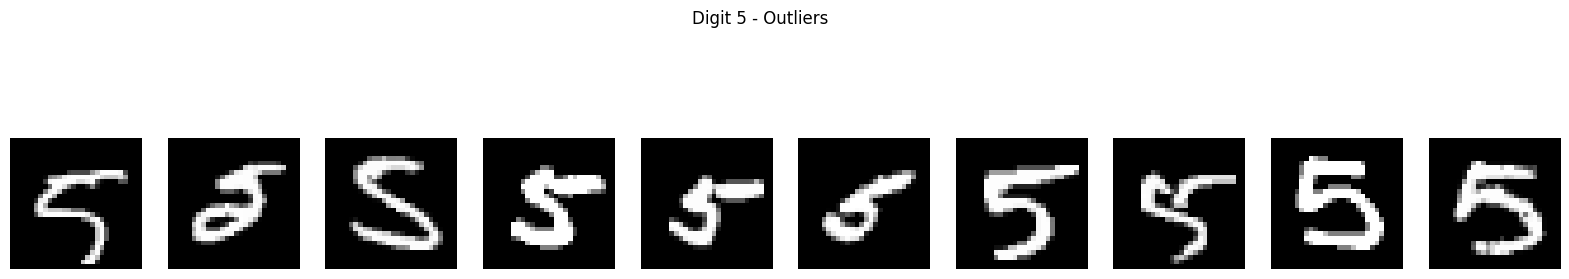

Digit 6: 5327 inliers, 591 outliers.


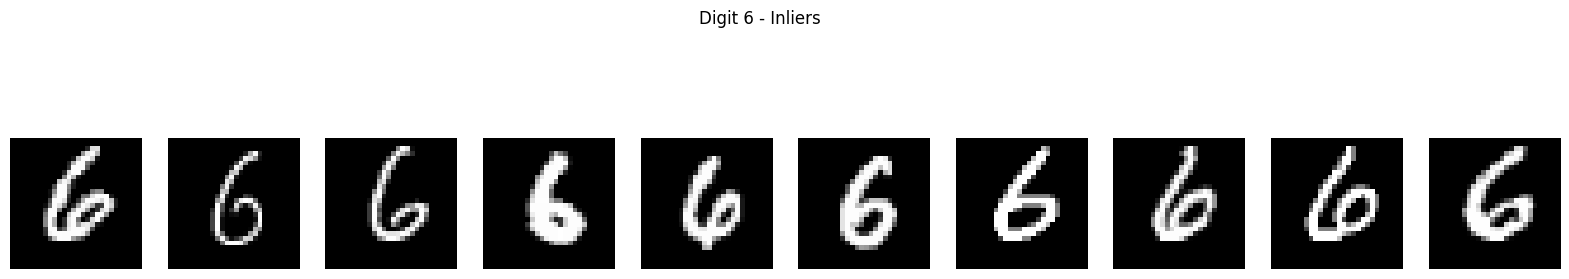

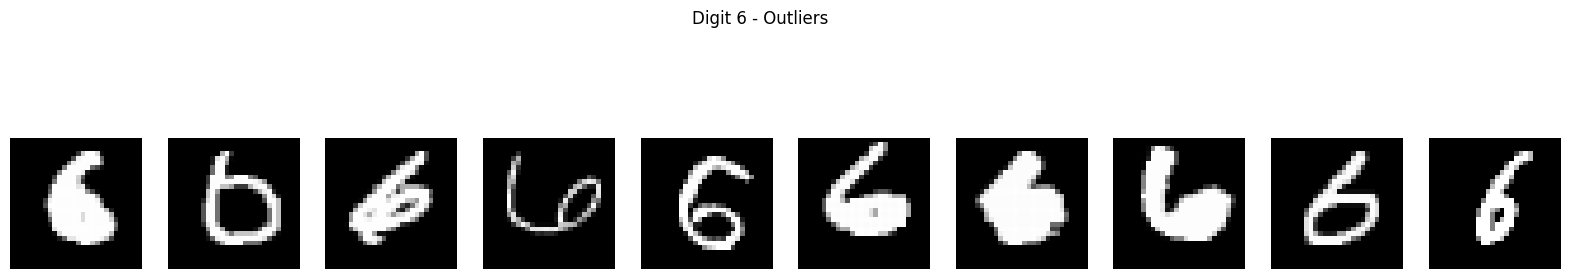

Digit 7: 5637 inliers, 628 outliers.


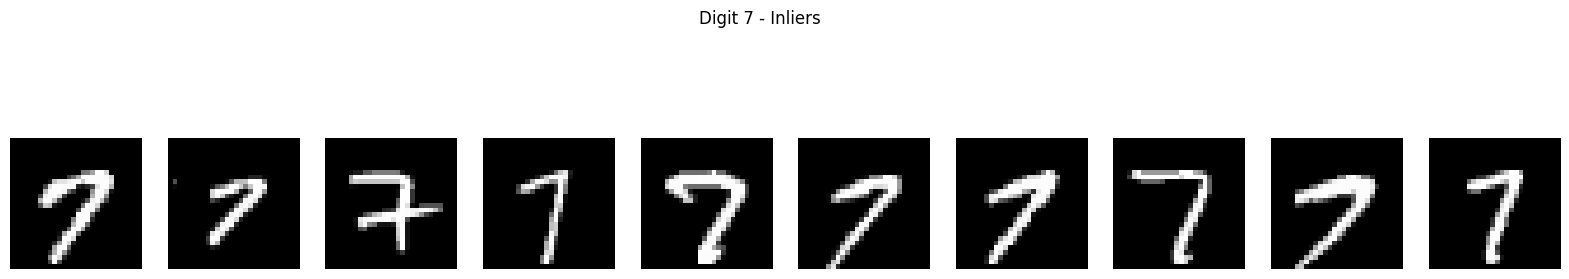

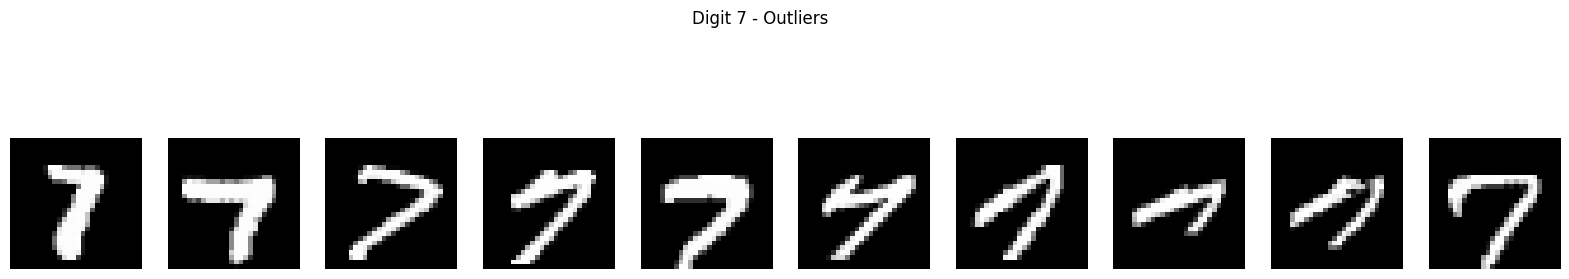

Digit 8: 5266 inliers, 585 outliers.


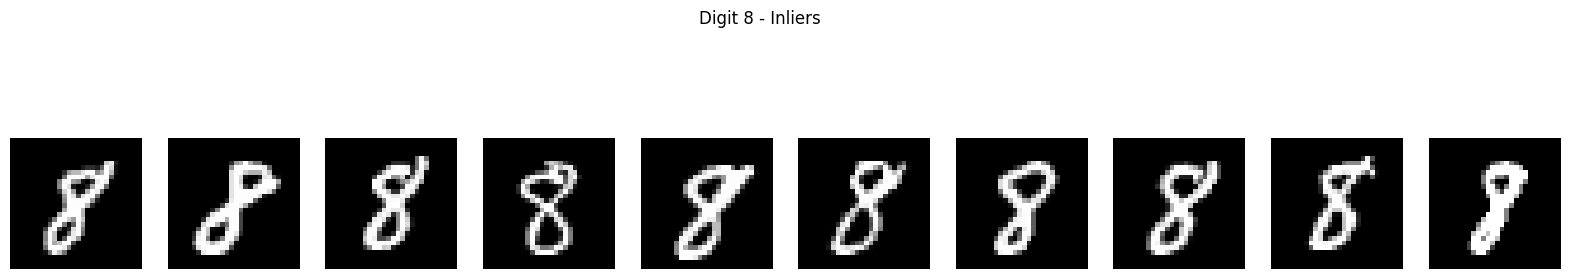

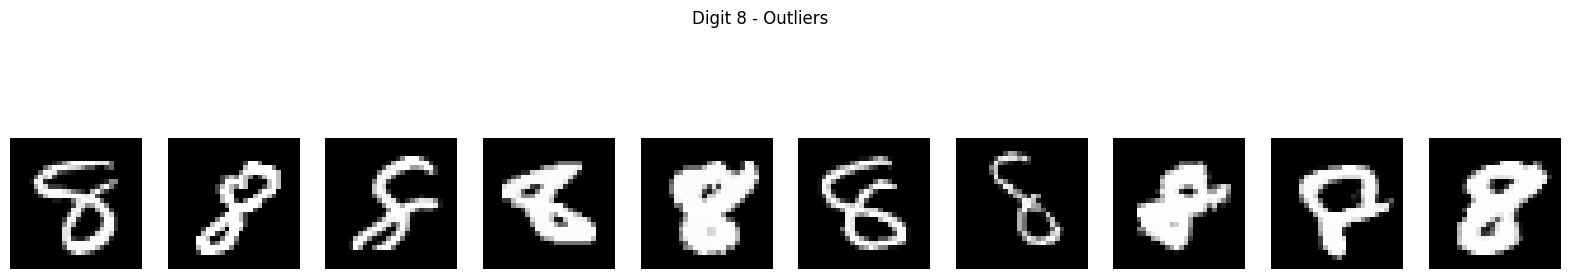

Digit 9: 5355 inliers, 594 outliers.


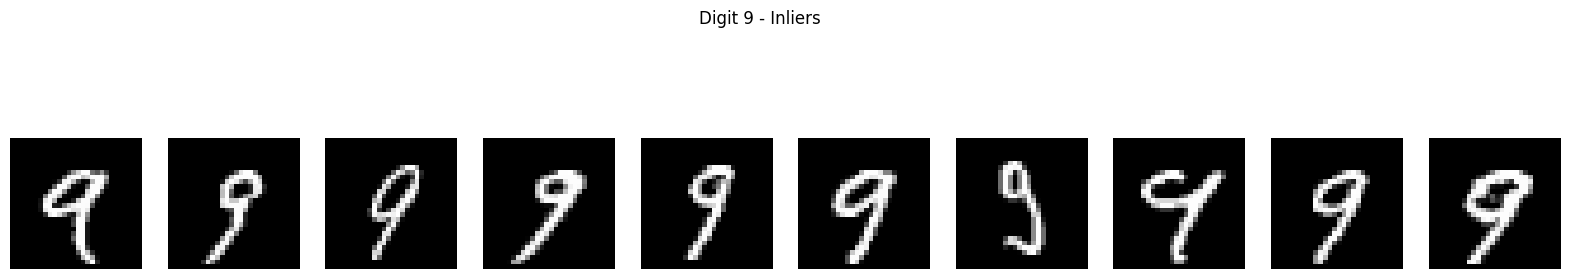

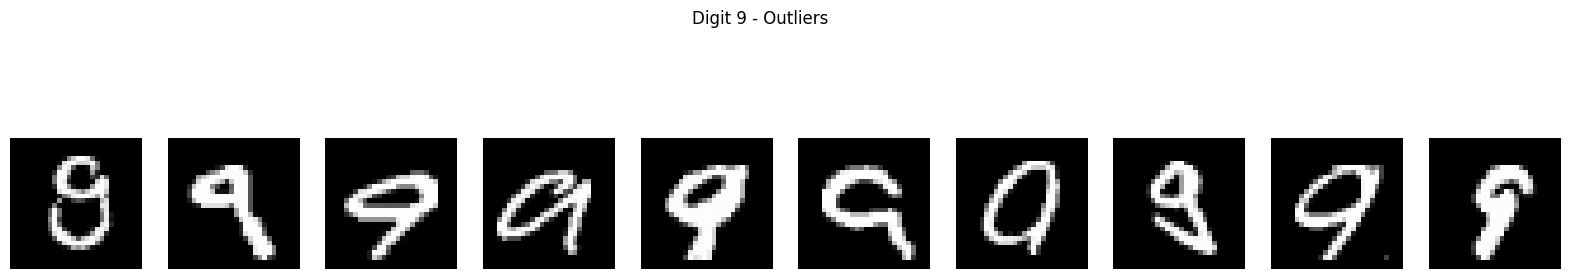

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten the images and normalize pixel values
x_train_flattened = x_train.reshape(x_train.shape[0], -1)  # Flatten to 1D
x_train_normalized = x_train_flattened / 255.0  # Normalize to [0, 1]

# Separate data by digit
digit_data = {digit: x_train_normalized[y_train == digit] for digit in range(10)}

# One-Class SVM for each digit
ocsvm_results = {}
nu = 0.1  # Fraction of outliers
gamma = 0.001  # Kernel coefficient

for digit, data in digit_data.items():
    print(f"Training One-Class SVM for digit {digit}...")
    ocsvm = OneClassSVM(kernel='rbf', nu=nu, gamma=gamma)
    ocsvm.fit(data)  # Train on the digit's data
    ocsvm_results[digit] = {
        "model": ocsvm,
        "data": data,
        "predictions": ocsvm.predict(data)  # Predict inliers (+1) and outliers (-1)
    }

# Function to plot inliers and outliers
def plot_samples(samples, title, n=10):
    plt.figure(figsize=(n * 2, 4))
    for i in range(min(n, len(samples))):
        plt.subplot(1, n, i + 1)
        plt.imshow(samples[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualize inliers and outliers for each digit
for digit in range(10):
    result = ocsvm_results[digit]
    data, predictions = result["data"], result["predictions"]

    # Separate inliers and outliers
    inliers = data[predictions == 1]
    outliers = data[predictions == -1]

    print(f"Digit {digit}: {len(inliers)} inliers, {len(outliers)} outliers.")

    # Plot inliers and outliers
    plot_samples(inliers[:10], title=f"Digit {digit} - Inliers")
    plot_samples(outliers[:10], title=f"Digit {digit} - Outliers")


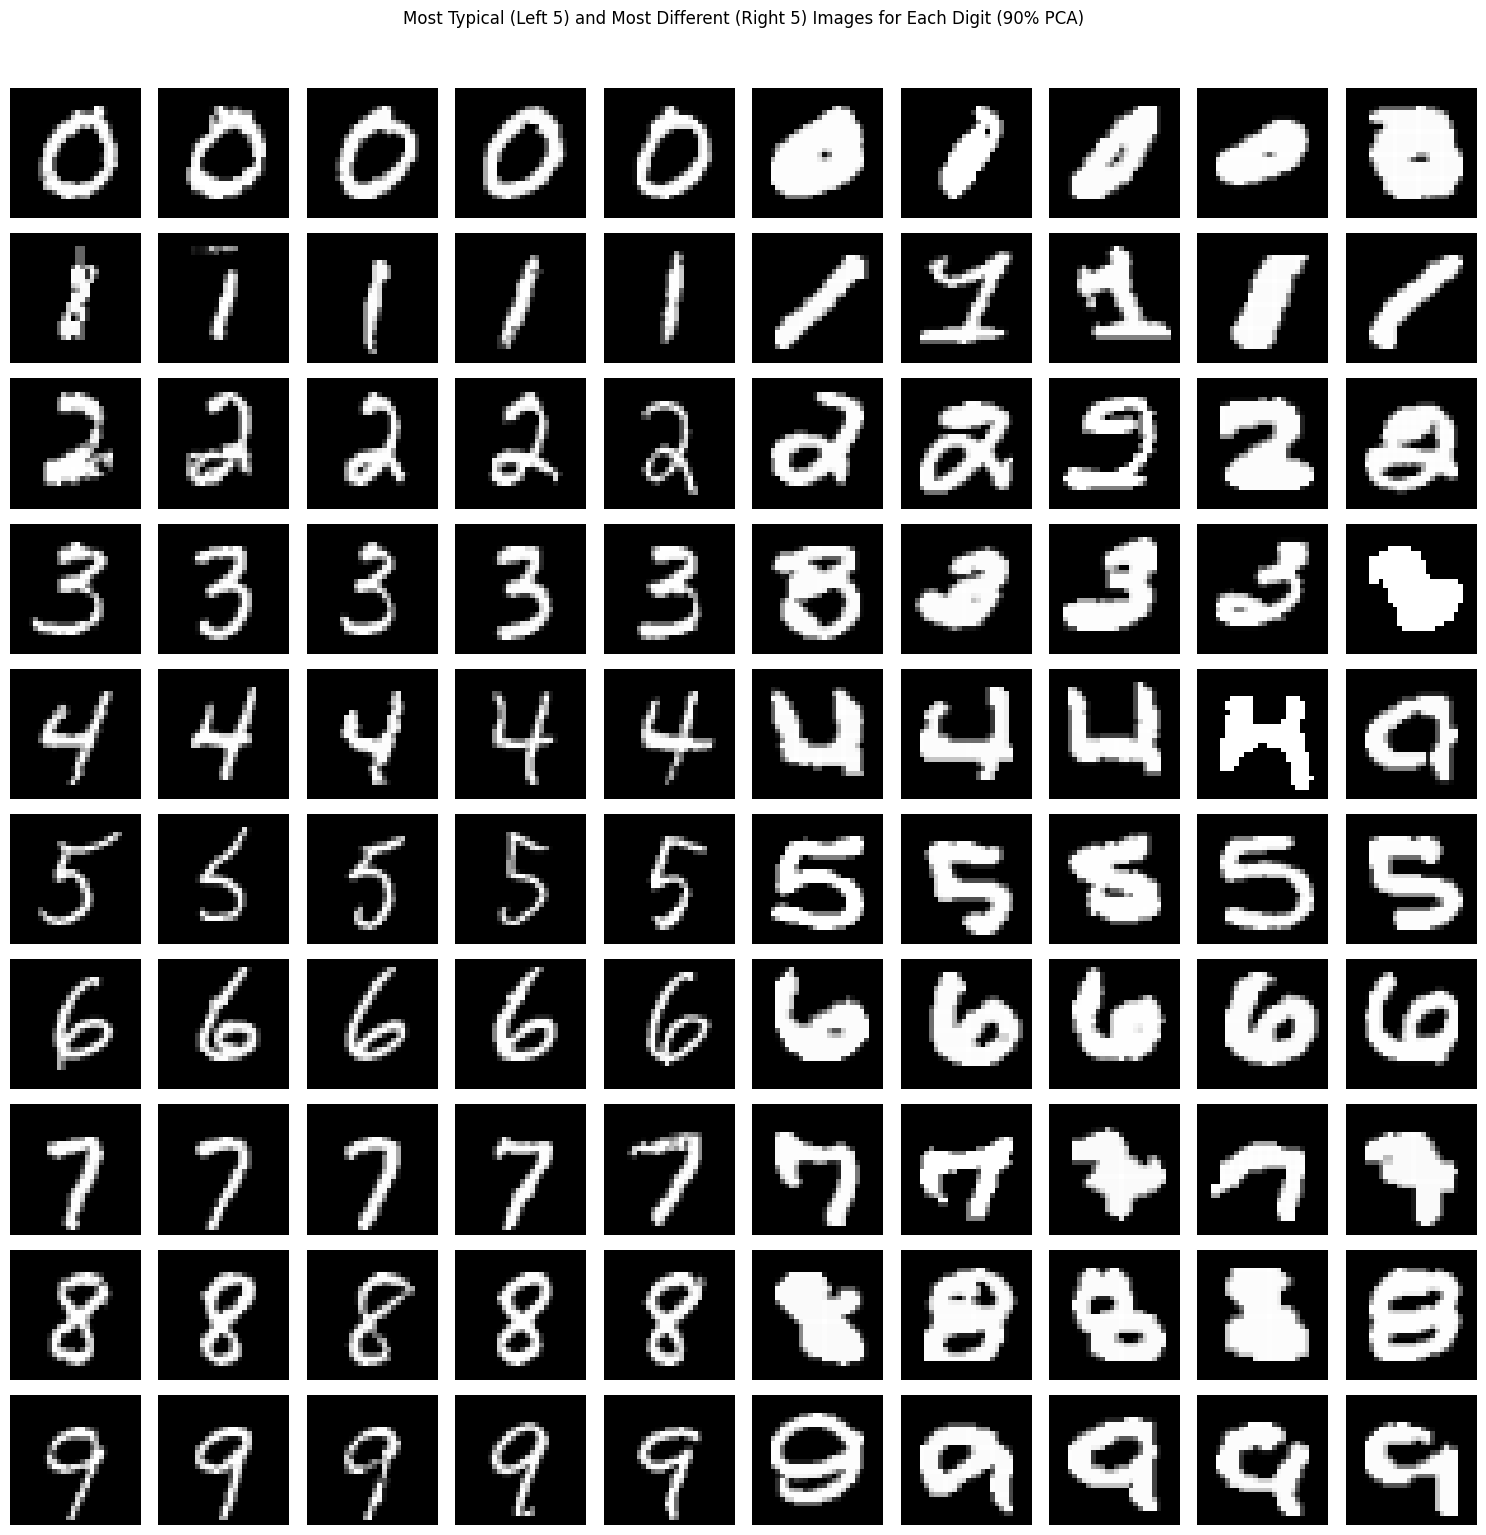

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the images
x_train = x_train.astype("float32") / 255.0

# Separate the dataset by digits
digit_groups = {digit: x_train[y_train == digit] for digit in range(10)}

# Function to get the most and least typical images based on PCA
def get_typical_and_outlier_images_pca(digit_images, num_images=5, variance_threshold=0.9):
    # Flatten the images to 1D for PCA (each image is 28x28 pixels, so 28*28=784 features)
    flattened_images = digit_images.reshape(digit_images.shape[0], -1)

    # Apply PCA and find the number of components required to explain the desired variance
    pca = PCA()
    pca.fit(flattened_images)

    # Find the number of components that explain the desired variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.where(cumulative_variance >= variance_threshold)[0][0] + 1

    # Project the images into the reduced PCA space
    reduced_images = pca.transform(flattened_images)[:, :n_components]

    # Calculate the distance of each image from the mean of the reduced space
    mean_reduced_image = np.mean(reduced_images, axis=0)
    distances = np.linalg.norm(reduced_images - mean_reduced_image, axis=1)

    # Find indices of the most and least typical images
    most_typical_indices = np.argsort(distances)[:num_images]    # closest to mean in PCA space
    most_different_indices = np.argsort(distances)[-num_images:]  # farthest from mean in PCA space

    return digit_images[most_typical_indices], digit_images[most_different_indices]

# Plotting typical and varied samples for each digit
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
plt.suptitle("Most Typical (Left 5) and Most Different (Right 5) Images for Each Digit (90% PCA)", y=1.02)

for digit in range(10):
    # Get typical and varied images based on PCA
    typical_images, different_images = get_typical_and_outlier_images_pca(digit_groups[digit])

    # Plot the typical images (left side)
    for i in range(5):
        axes[digit, i].imshow(typical_images[i], cmap='gray')
        axes[digit, i].axis('off')

    # Plot the different images (right side)
    for i in range(5):
        axes[digit, i + 5].imshow(different_images[i], cmap='gray')
        axes[digit, i + 5].axis('off')

plt.tight_layout()
plt.show()


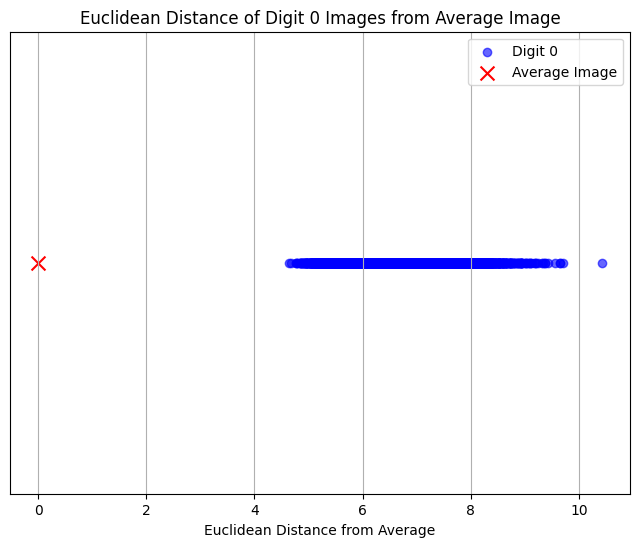

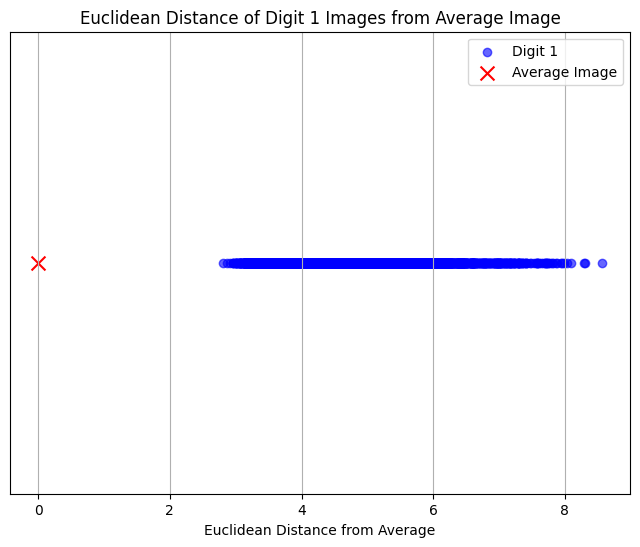

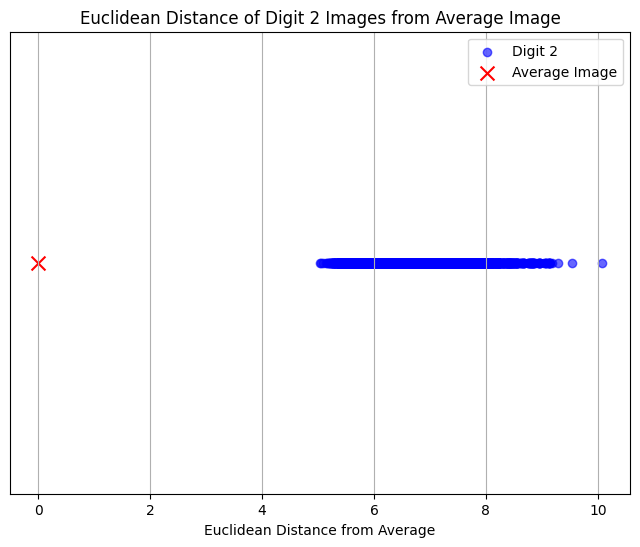

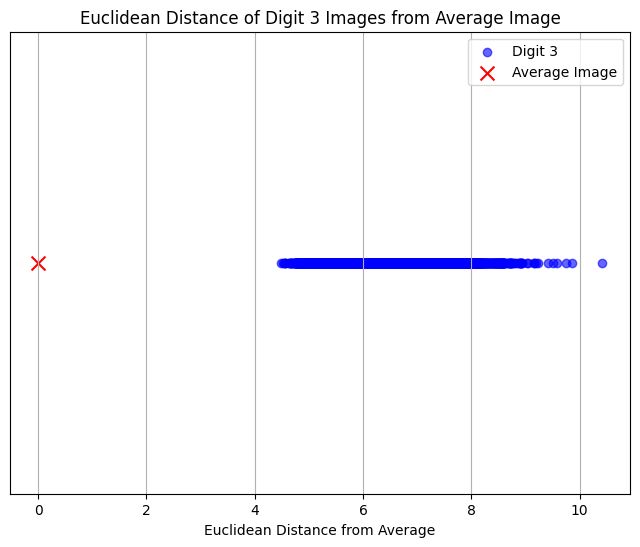

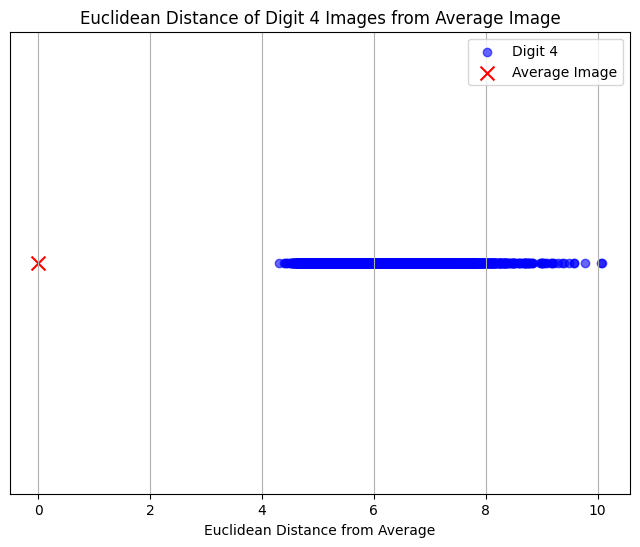

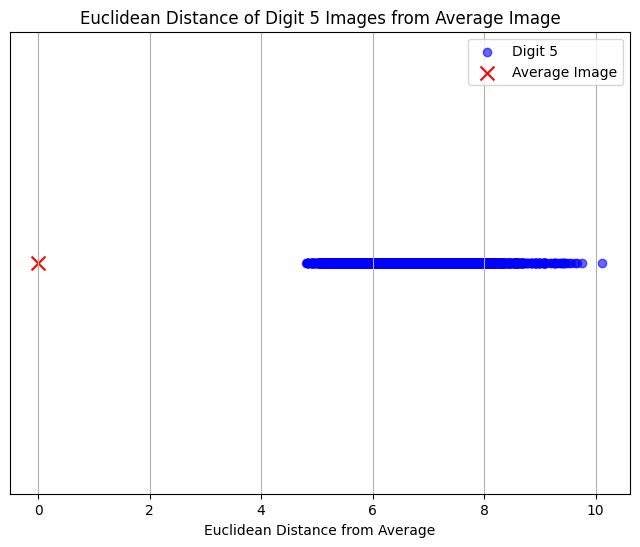

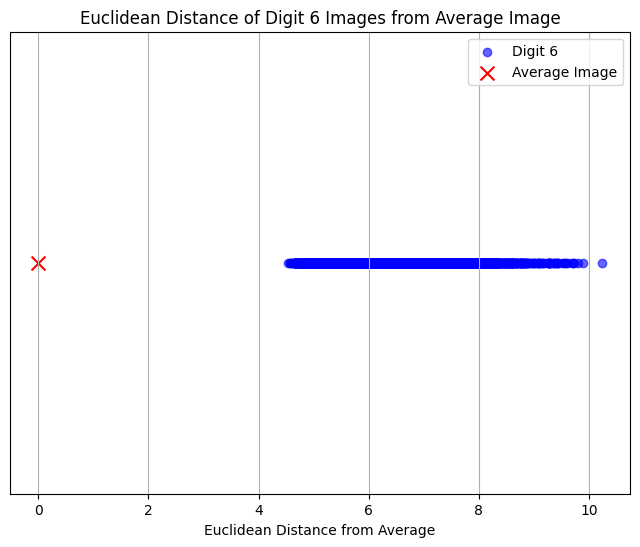

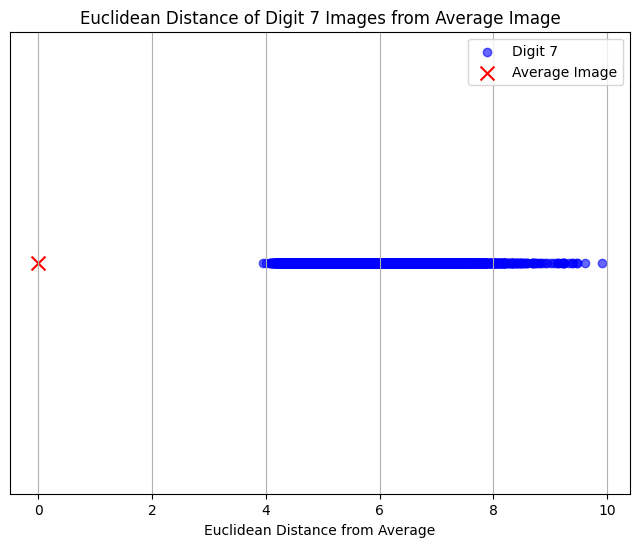

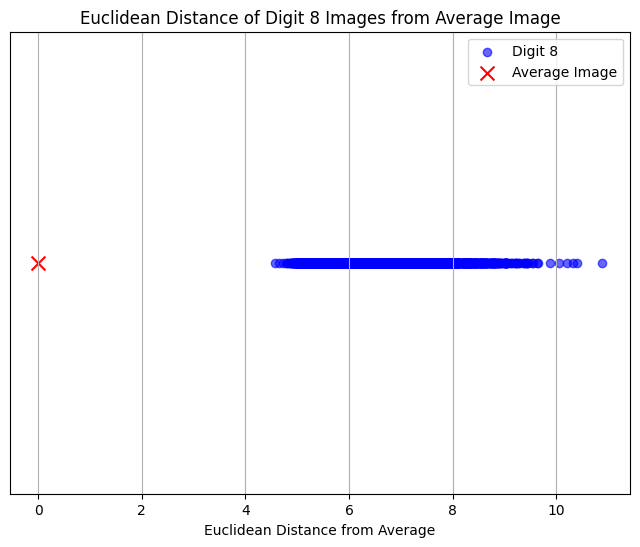

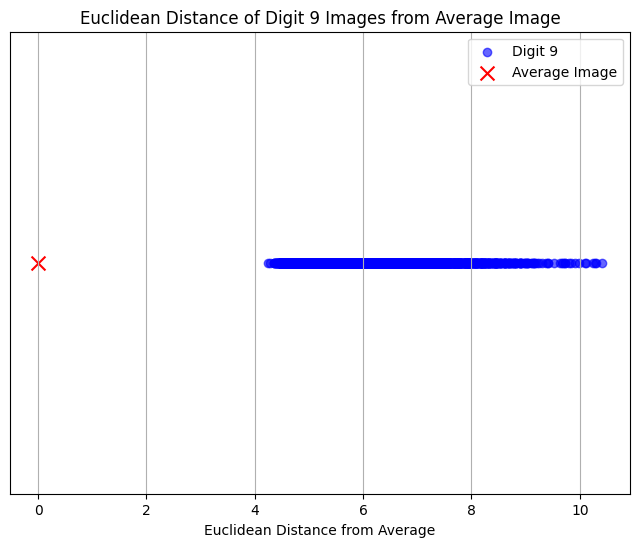

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the MNIST dataset
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the images
x_train = x_train.astype("float32") / 255.0

# Separate the dataset by digits
digit_groups = {digit: x_train[y_train == digit] for digit in range(10)}

# Function to get the most and least typical images based on PCA
def get_typical_and_outlier_images_pca(digit_images, num_images=5, variance_threshold=0.9):
    # Flatten the images to 1D for PCA (each image is 28x28 pixels, so 28*28=784 features)
    flattened_images = digit_images.reshape(digit_images.shape[0], -1)

    # Apply PCA and find the number of components required to explain the desired variance
    pca = PCA()
    pca.fit(flattened_images)

    # Find the number of components that explain the desired variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.where(cumulative_variance >= variance_threshold)[0][0] + 1

    # Project the images into the reduced PCA space
    reduced_images = pca.transform(flattened_images)[:, :n_components]

    # Calculate the distance of each image from the mean of the reduced space
    mean_reduced_image = np.mean(reduced_images, axis=0)
    distances = np.linalg.norm(reduced_images - mean_reduced_image, axis=1)

    return reduced_images, distances

# Plotting distances as points in a 2D scatter plot for each digit
for digit in range(10):
    # Get PCA reduced images and distances
    reduced_images, distances = get_typical_and_outlier_images_pca(digit_groups[digit])

    # Plot the distances as points in a 2D plot
    plt.figure(figsize=(8, 6))
    plt.scatter(distances, np.zeros_like(distances), alpha=0.6, c='blue', label=f'Digit {digit}')

    # Highlight the average image at the origin
    plt.scatter(0, 0, color='red', marker='x', s=100, label='Average Image')

    # Customize plot
    plt.title(f'Euclidean Distance of Digit {digit} Images from Average Image')
    plt.xlabel('Euclidean Distance from Average')
    plt.ylabel('')
    plt.yticks([])  # Remove y-axis as we're only interested in distance
    plt.legend()
    plt.grid(True)

    # Show plot for this digit
    plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize the images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Separate the dataset by digits
digit_groups = {digit: x_train[y_train == digit] for digit in range(10)}

# Function to get the most and least typical images based on PCA
def get_typical_and_outlier_images_pca(digit_images, num_images=5, variance_threshold=0.9):
    # Flatten the images to 1D for PCA (each image is 28x28 pixels, so 28*28=784 features)
    flattened_images = digit_images.reshape(digit_images.shape[0], -1)

    # Apply PCA and find the number of components required to explain the desired variance
    pca = PCA()
    pca.fit(flattened_images)

    # Find the number of components that explain the desired variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.where(cumulative_variance >= variance_threshold)[0][0] + 1

    # Project the images into the reduced PCA space
    reduced_images = pca.transform(flattened_images)[:, :n_components]

    # Calculate the distance of each image from the mean of the reduced space
    mean_reduced_image = np.mean(reduced_images, axis=0)
    distances = np.linalg.norm(reduced_images - mean_reduced_image, axis=1)

    # Find indices of the most and least typical images
    most_typical_indices = np.argsort(distances)[:int(0.2 * len(distances))]    # 9% closest to mean in PCA space
    most_different_indices = np.argsort(distances)[-int(0.2 * len(distances)):]  # 1% farthest from mean in PCA space

    return digit_images[most_typical_indices], digit_images[most_different_indices]

# Extract the most typical and least typical images for each digit
typical_images = []
different_images = []
for digit in range(10):
    typical, different = get_typical_and_outlier_images_pca(digit_groups[digit])
    typical_images.append(typical)
    different_images.append(different)

# Combine the data for CNN training
X_train_manipulated = np.concatenate(typical_images + different_images, axis=0)
y_train_manipulated = np.concatenate([np.full(len(t), digit) for digit, t in enumerate(typical_images)] +
                                    [np.full(len(d), digit) for digit, d in enumerate(different_images)], axis=0)

# Normalize the manipulated data (it's already normalized, so this step is for clarity)
X_train_manipulated = X_train_manipulated.astype("float32") / 255.0

# Define CNN model function
def build_cnn_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform cross-validation
def cross_validate_model(X, y):
    cv_accuracy = []
    for train_idx, val_idx in kf.split(X):
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y[train_idx], y[val_idx]

        # Build and train the model
        model = build_cnn_model(input_shape=(28, 28, 1))
        model.fit(X_train_cv, y_train_cv, epochs=5, batch_size=64, verbose=0)

        # Evaluate on the validation set
        val_accuracy = model.evaluate(X_val_cv, y_val_cv, verbose=0)[1]
        cv_accuracy.append(val_accuracy)

    # Calculate average accuracy
    avg_cv_accuracy = np.mean(cv_accuracy)

    # Train the final model on the entire training set and evaluate on the test set
    model.fit(X, y, epochs=5, batch_size=64, verbose=0)
    test_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]
    test_error_rate = 1 - test_accuracy

    return avg_cv_accuracy, test_accuracy, test_error_rate

# Evaluate on Original MNIST Data
print("Evaluating on Original MNIST Data:")
orig_cv_accuracy, orig_test_accuracy, orig_test_error_rate = cross_validate_model(x_train, y_train)
print(f"Cross-validated Accuracy: {orig_cv_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {orig_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {orig_test_error_rate * 100:.2f}%")

# Evaluate on Manipulated Data
print("\nEvaluating on Manipulated Data (6% Typical, 5% Outlier):")
manip_cv_accuracy, manip_test_accuracy, manip_test_error_rate = cross_validate_model(X_train_manipulated, y_train_manipulated)
print(f"Cross-validated Accuracy: {manip_cv_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {manip_test_accuracy * 100:.2f}%")
print(f"Test Set Error Rate: {manip_test_error_rate * 100:.2f}%")


Evaluating on Original MNIST Data:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-validated Accuracy: 98.73%
Test Set Accuracy: 99.05%
Test Set Error Rate: 0.95%

Evaluating on Manipulated Data (6% Typical, 5% Outlier):
Cross-validated Accuracy: 92.45%
Test Set Accuracy: 73.84%
Test Set Error Rate: 26.16%


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Cross-validation with 100.0% of the data...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Average cross-validated accuracy with 100.0% of the data: 98.84%

Cross-validation with 75.0% of the data...
Average cross-validated accuracy with 75.0% of the data: 98.52%

Cross-validation with 50.0% of the data...
Average cross-validated accuracy with 50.0% of the data: 98.31%

Cross-validation with 25.0% of the data...
Average cross-validated accuracy with 25.0% of the data: 97.69%

Cross-validation with 10.0% of the data...
Average cross-validated accuracy with 10.0% of the data: 96.43%

Cross-validation with 5.0% of the data...
Average cross-validated accuracy with 5.0% of the data: 94.87%



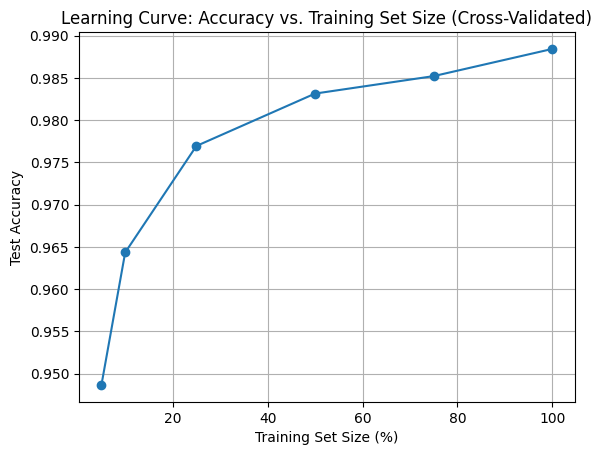

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import random

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_train = x_train[..., np.newaxis]

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)

# Define the CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model




# Perform K-fold Cross-Validation
def cross_val_accuracy(fraction, n_splits=5):
    # Reduce dataset by fraction
    num_samples = int(len(x_train) * fraction)
    indices = random.sample(range(len(x_train)), num_samples)
    x_train_reduced = x_train[indices]
    y_train_reduced = y_train[indices]

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_accuracies = []

    for train_index, val_index in kf.split(x_train_reduced):
        x_fold_train, x_fold_val = x_train_reduced[train_index], x_train_reduced[val_index]
        y_fold_train, y_fold_val = y_train_reduced[train_index], y_train_reduced[val_index]

        # Create a new model instance for each fold
        model = create_cnn_model()

        # Train the model
        model.fit(x_fold_train, y_fold_train, epochs=5, batch_size=64, verbose=0)

        # Evaluate on the validation set
        val_loss, val_accuracy = model.evaluate(x_fold_val, y_fold_val, verbose=0)
        fold_accuracies.append(val_accuracy)

    # Return the average accuracy across all folds
    return np.mean(fold_accuracies)

# List of fractions of the dataset to use (from full dataset to very small subset)
fractions = [1.0, 0.75, 0.5, 0.25, 0.1, 0.05]

# Store accuracies for each fraction
accuracies = []

for frac in fractions:
    print(f"Cross-validation with {frac*100}% of the data...")
    accuracy = cross_val_accuracy(frac)
    accuracies.append(accuracy)
    print(f"Average cross-validated accuracy with {frac*100}% of the data: {accuracy * 100:.2f}%\n")

# Plotting the learning curve
import matplotlib.pyplot as plt

plt.plot([f * 100 for f in fractions], accuracies, marker='o')
plt.title("Learning Curve: Accuracy vs. Training Set Size (Cross-Validated)")
plt.xlabel("Training Set Size (%)")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold
import numpy as np
import random

# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data to range [0, 1]
x_train = x_train[..., np.newaxis].astype('float32') / 255.0

# Define the CNN model
def build_cnn_model(input_shape=(28, 28, 1)):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to perform cross-validation
def cross_validate_cnn(x, y, n_splits=5, epochs=5, batch_size=64):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_accuracies = []

    for train_index, val_index in kf.split(x):
        x_fold_train, x_fold_val = x[train_index], x[val_index]
        y_fold_train, y_fold_val = y[train_index], y[val_index]

        # Build and train the model
        model = build_cnn_model(input_shape=(28, 28, 1))
        model.fit(x_fold_train, y_fold_train, epochs=epochs, batch_size=batch_size, verbose=0)

        # Evaluate on validation set
        val_loss, val_accuracy = model.evaluate(x_fold_val, y_fold_val, verbose=0)
        fold_accuracies.append(val_accuracy)

    return np.mean(fold_accuracies), np.std(fold_accuracies)

# Randomly select 5% of the MNIST training data
fraction = 0.05
num_samples = int(len(x_train) * fraction)
indices = random.sample(range(len(x_train)), num_samples)

x_train_small = x_train[indices]
y_train_small = y_train[indices]

# Perform cross-validation
mean_accuracy, std_accuracy = cross_validate_cnn(x_train_small, y_train_small, n_splits=5, epochs=5, batch_size=64)

print(f"Cross-validated Accuracy on 5% of MNIST data: {mean_accuracy:.4f} ± {std_accuracy:.4f}")


Cross-validated Accuracy on 5% of MNIST data: 0.9487 ± 0.0097



Analyzing digit 0:


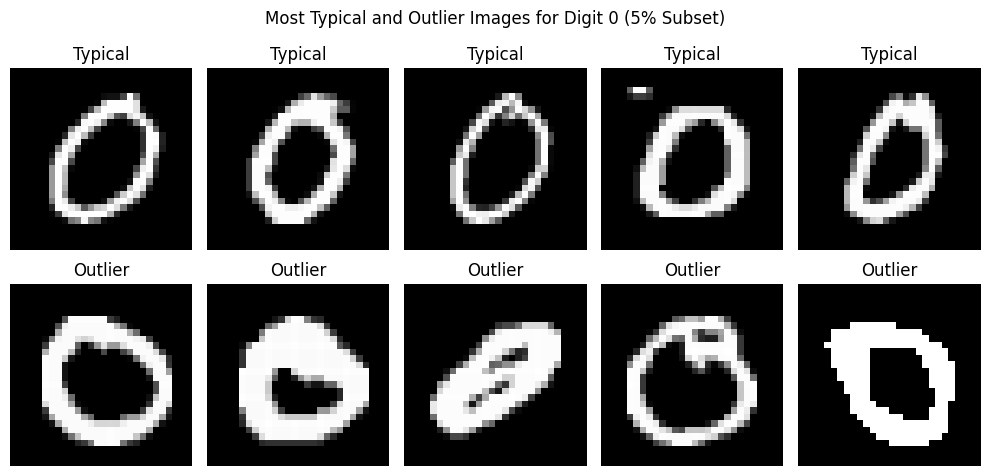


Analyzing digit 1:


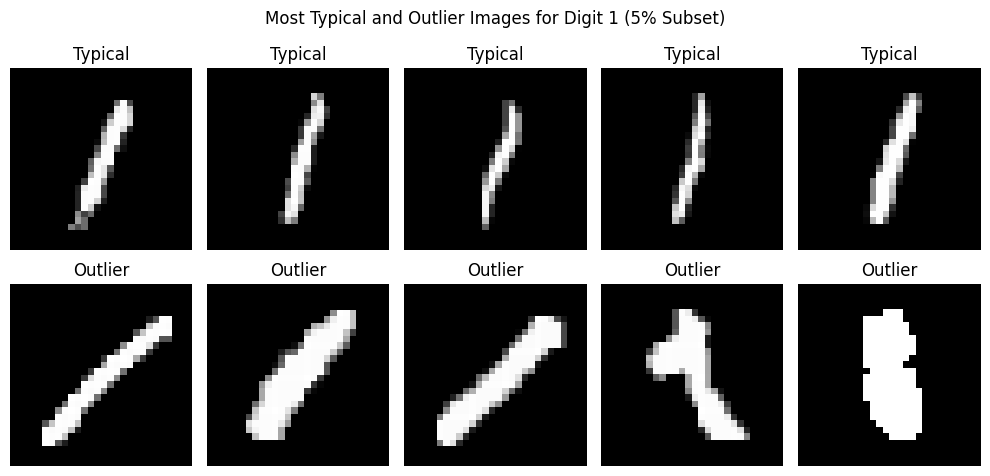


Analyzing digit 2:


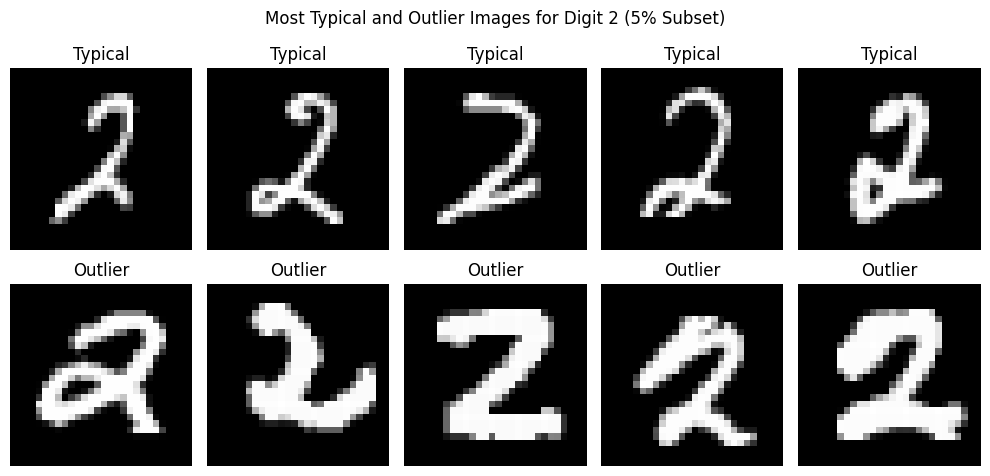


Analyzing digit 3:


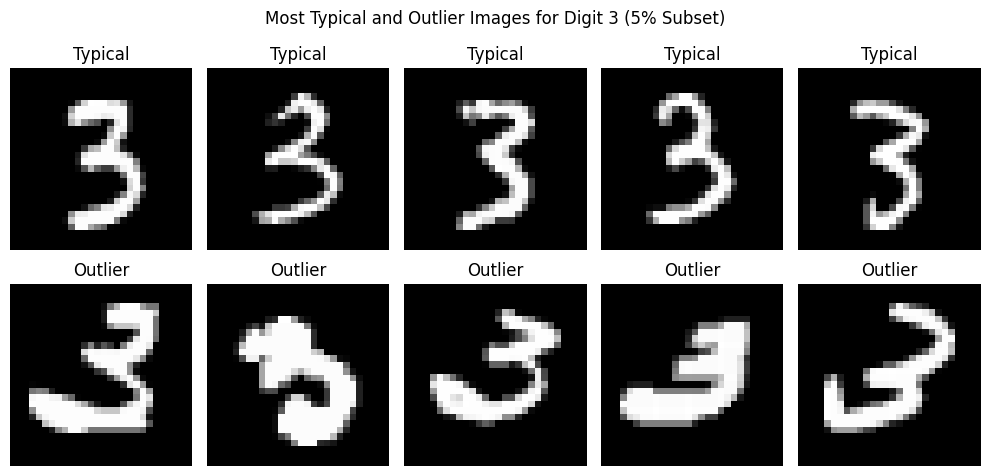


Analyzing digit 4:


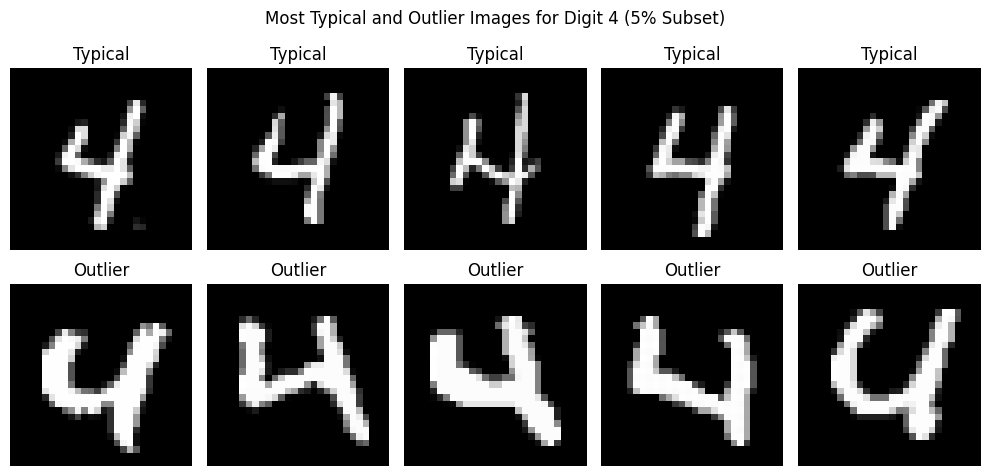


Analyzing digit 5:


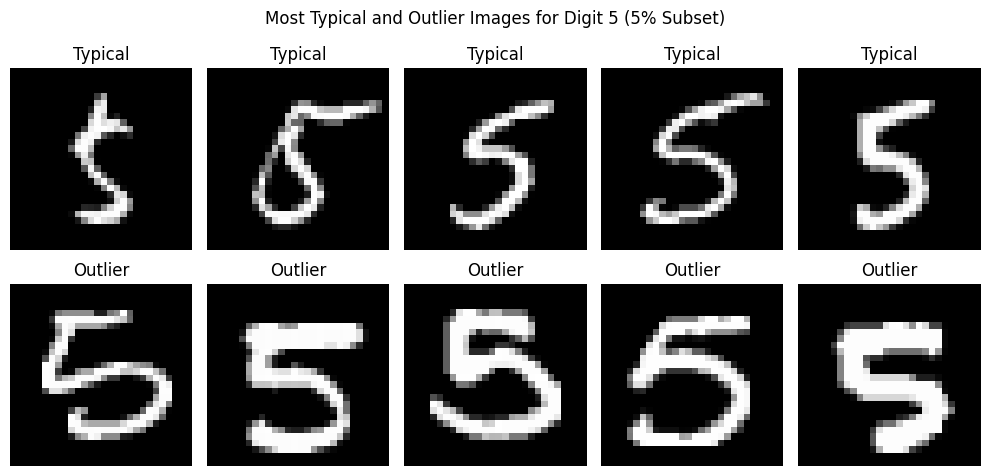


Analyzing digit 6:


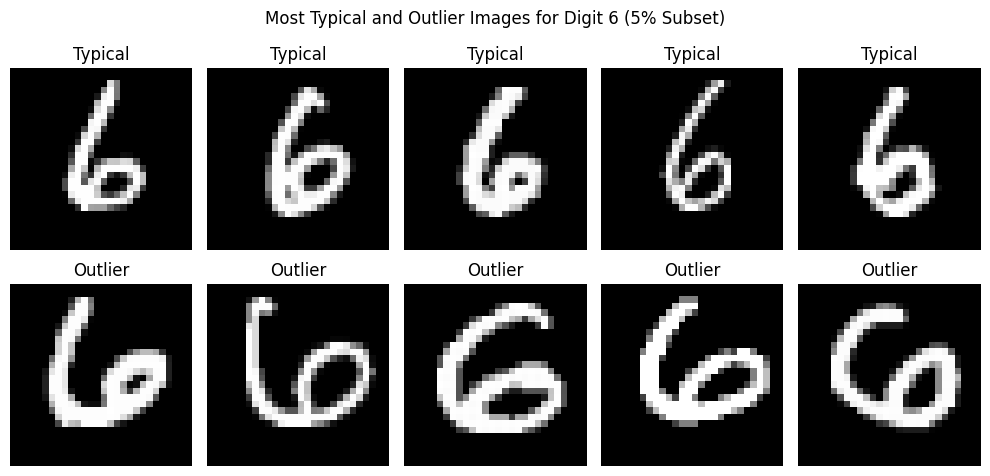


Analyzing digit 7:


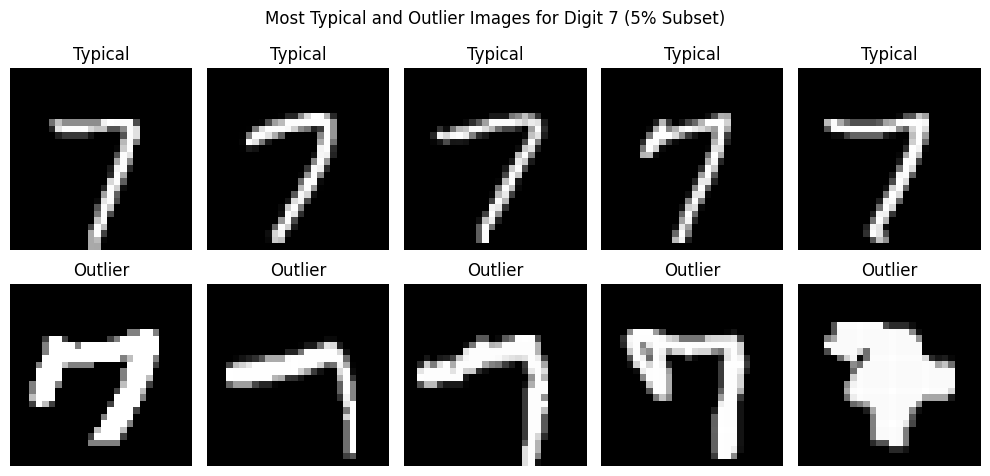


Analyzing digit 8:


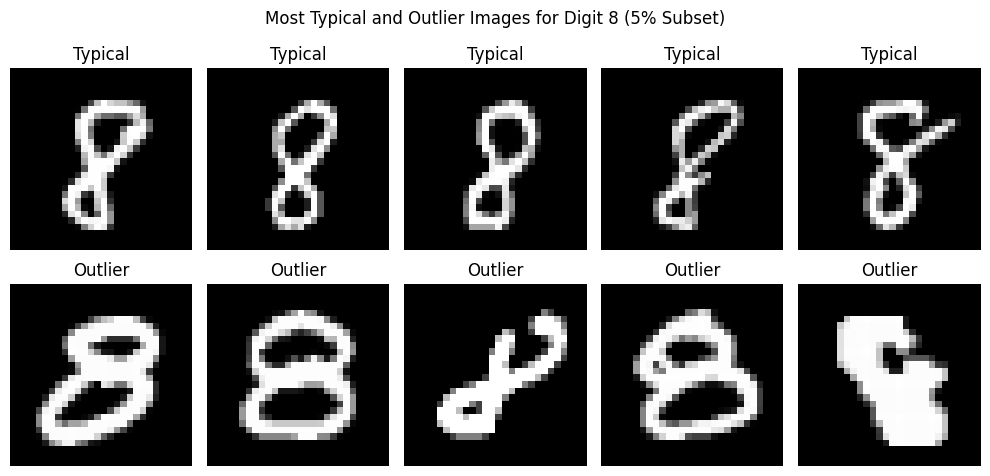


Analyzing digit 9:


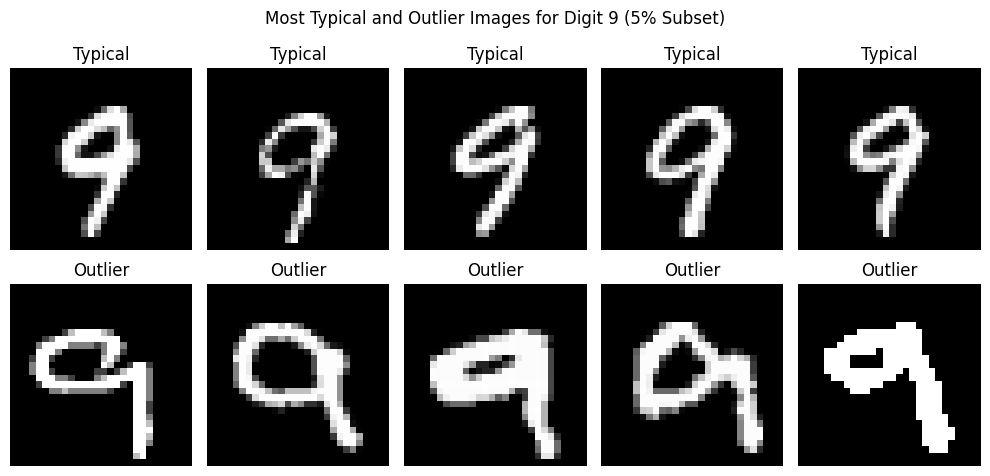

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Randomly select 5% of the MNIST training data
fraction = 0.05
num_samples = int(len(x_train) * fraction)
indices = random.sample(range(len(x_train)), num_samples)

x_train_small = x_train[indices]
y_train_small = y_train[indices]

# Function to get the most and least typical images based on PCA
def get_typical_and_outlier_images_pca(digit_images, num_images=5, variance_threshold=0.9):
    """
    Identifies the most typical and outlier images for a given set of images based on PCA.

    Parameters:
    - digit_images (np.ndarray): Images of a specific digit.
    - num_images (int): Number of typical and outlier images to return.
    - variance_threshold (float): Proportion of variance to retain in PCA.

    Returns:
    - typical_images (np.ndarray): Most typical images for the digit.
    - outlier_images (np.ndarray): Most outlier images for the digit.
    """
    # Flatten images for PCA (28x28 -> 784 features)
    flattened_images = digit_images.reshape(digit_images.shape[0], -1)

    # Apply PCA
    pca = PCA()
    pca.fit(flattened_images)

    # Find number of components to explain desired variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.where(cumulative_variance >= variance_threshold)[0][0] + 1

    # Project images to reduced PCA space
    reduced_images = pca.transform(flattened_images)[:, :n_components]

    # Calculate distance of each image from the mean in PCA space
    mean_reduced_image = np.mean(reduced_images, axis=0)
    distances = np.linalg.norm(reduced_images - mean_reduced_image, axis=1)

    # Find most typical and outlier indices
    most_typical_indices = np.argsort(distances)[:num_images]  # Closest to mean
    most_different_indices = np.argsort(distances)[-num_images:]  # Farthest from mean

    return digit_images[most_typical_indices], digit_images[most_different_indices]

# Visualize the most typical and outlier images for the 5% subset
def visualize_typical_outlier_images_subset(x_data, y_data, digit, num_images=5):
    """
    Visualize the most typical and outlier images for a specific digit in the reduced subset.

    Parameters:
    - x_data (np.ndarray): Images in the reduced subset.
    - y_data (np.ndarray): Labels corresponding to the images.
    - digit (int): The digit to analyze (0-9).
    - num_images (int): Number of typical and outlier images to visualize.
    """
    # Filter the subset for the given digit
    digit_images = x_data[y_data == digit]

    # Get typical and outlier images
    typical_images, outlier_images = get_typical_and_outlier_images_pca(digit_images, num_images)

    # Plot typical images
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Most Typical and Outlier Images for Digit {digit} (5% Subset)")

    for i, image in enumerate(typical_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title("Typical")
        plt.axis('off')

    # Plot outlier images
    for i, image in enumerate(outlier_images):
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(image, cmap='gray')
        plt.title("Outlier")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize typical and outlier images for all digits (0–9)
for digit in range(10):
    print(f"\nAnalyzing digit {digit}:")
    visualize_typical_outlier_images_subset(x_train_small, y_train_small, digit=digit, num_images=5)




In [ ]:
# Count the number of each digit in the 5% subset
unique, counts = np.unique(y_train_small, return_counts=True)

# Combine the digit labels and their counts into a dictionary for easy visualization
digit_counts = dict(zip(unique, counts))

# Print the counts for each digit
for digit, count in digit_counts.items():
    print(f"Digit {digit}: {count} samples")


Digit 0: 301 samples
Digit 1: 332 samples
Digit 2: 273 samples
Digit 3: 316 samples
Digit 4: 297 samples
Digit 5: 296 samples
Digit 6: 291 samples
Digit 7: 336 samples
Digit 8: 289 samples
Digit 9: 269 samples
